# Maud CNO Analysis

In [45]:
# Imports

import os
import pickle

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from scipy.stats import wilcoxon
# from processing_TowerCoordinates import *

In [134]:
path_to_data_folder = '/home/david/MyLocalData/Maud/' # Maud work computer
# path_to_data_folder = 'C:/Users/mauds/Documents' # Maud personal computer
pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")

mice_list: list[str] = ["MOU3867","MOU4551","MOU4623","MOU4562","MOU4560","MOU4623","MOU4624","MOU4552","MOU4563","MOU4561","MOU4692","MOU4694","MOU4695","MOU4696","MOU4698","MOU4703","MOU4704","MOU4172","MOU4175","MOU4185"]
UL_Gq_D1_DLS: list[str] = ["MOU4623","MOU4551","MOU4185"]
UL_Gq_D2_DLS: list[str] = ["MOU4562","MOU4560","MOU4696","MOU4694","MOU4172","MOU4175"]
UL_Gq_D1_DMS: list[str] = ["MOU4624","MOU4552","MOU4703","MOU4704","MOU3867"]
UL_Gq_D2_DMS: list[str] = ["MOU4563","MOU4561","MOU4695","MOU4698","MOU4692"]
# UL_Gq_D1_dS: list[str] = ["MOU4183","MOU4185"]
# UL_Gq_D2_dS: list[str] = ["MOU4172","MOU4175"]

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions')
    # print(session_list[mouse], '\n')

Hello, I'm MOU3867! I have foraged for 46 sessions
Hello, I'm MOU4551! I have foraged for 46 sessions
Hello, I'm MOU4623! I have foraged for 46 sessions
Hello, I'm MOU4562! I have foraged for 46 sessions
Hello, I'm MOU4560! I have foraged for 46 sessions
Hello, I'm MOU4623! I have foraged for 46 sessions
Hello, I'm MOU4624! I have foraged for 46 sessions
Hello, I'm MOU4552! I have foraged for 46 sessions
Hello, I'm MOU4563! I have foraged for 46 sessions
Hello, I'm MOU4561! I have foraged for 46 sessions
Hello, I'm MOU4692! I have foraged for 46 sessions
Hello, I'm MOU4694! I have foraged for 46 sessions
Hello, I'm MOU4695! I have foraged for 46 sessions
Hello, I'm MOU4696! I have foraged for 46 sessions
Hello, I'm MOU4698! I have foraged for 46 sessions
Hello, I'm MOU4703! I have foraged for 46 sessions
Hello, I'm MOU4704! I have foraged for 46 sessions
Hello, I'm MOU4172! I have foraged for 46 sessions
Hello, I'm MOU4175! I have foraged for 46 sessions
Hello, I'm MOU4185! I have fora

In [135]:
folder_path_mouse_to_process=os.path.join(path_to_data_folder,mice_list[0])
print(folder_path_mouse_to_process)

session_control_first=session_list[mice_list[0]][28]
print(session_control_first)

session_CNO_first=session_list[mice_list[0]][31]
print(session_CNO_first)

session_control_second = session_list[mice_list[0]][33]
print(session_control_second)

session_CNO_second = session_list[mice_list[0]][36]
print(session_CNO_second)

# session_control_third = session_list[mice_list[0]][41]
# print(session_control_third)

# session_CNO_third = session_list[mice_list[0]][44]
# print(session_CNO_third)


/home/david/MyLocalData/Maud/MOU3867
MOU3867_20230207-1011
MOU3867_20230208-1718
MOU3867_20230209-1639
MOU3867_20230211-1041


In [136]:
# # Définir des dictionnaires pour stocker les résultats par session et par souris
# X_positions_dict = {}
# Y_positions_dict = {}
# total_distances = {}
# average_speeds = {}
# distances_dict = {}
# speeds_dict = {}
# angular_speeds_dict = {}
# all_epochs_dict = {}
# traject_time_dict = {}
# run_around_tower_results_dict = {}
# runs_around_tower_dict = {}
# trapezes_coordinates_dict = {}
# towers_coordinates_dict = {}
# runs_between_towers_dict = {}
# exploratory_runs_dict = {}

# # Définir les indices de sessions
# session_indices = {
#     "control_first": 16,
#     "CNO_first": 20,
#     "control_second": 26,
#     "CNO_second": 30,
#     "control_third": 40,
#     "CNO_third": 42
# }

# # Paire de sessions à analyser
# session_pairs = [
#     ("control_first", "CNO_first"),
#     ("control_second", "CNO_second"),
#     ("control_third","CNO_third")
# ]

# # Boucle pour traiter chaque souris
# for mouse in mice_list:
    
#     # Initialiser les sous-dictionnaires pour chaque souris
#     X_positions_dict[mouse] = {}
#     Y_positions_dict[mouse] = {}
#     total_distances[mouse] = {}
#     average_speeds[mouse] = {}
#     distances_dict[mouse] = {}
#     speeds_dict[mouse] = {}
#     angular_speeds_dict[mouse] = {}
#     all_epochs_dict[mouse] = {}
#     traject_time_dict[mouse] = {}
#     run_around_tower_results_dict[mouse] = {}
#     runs_around_tower_dict[mouse] = {}
#     trapezes_coordinates_dict[mouse] = {}
#     towers_coordinates_dict[mouse] = {}
#     runs_between_towers_dict[mouse] = {}
#     exploratory_runs_dict[mouse] = {}
    
#     # Itérer sur chaque paire de sessions
#     for control_session, CNO_session in session_pairs:
#         for session_type in (control_session, CNO_session):
#             # Identifier la session à traiter
#             session_index = session_indices[session_type]
            
#             # Vérifier que l'indice de session existe dans la liste des sessions de la souris
#             if session_index >= len(session_list[mouse]):
#                 print(f"Erreur : l'indice {session_index} dépasse le nombre de sessions pour {mouse}.")
#                 continue
            
#             session_to_process = session_list[mouse][session_index]
            
#             # Chemin vers le fichier pickle
#             output_pickle_filepath = os.path.join(path_to_data_folder, mouse, session_to_process, f"{session_to_process}_basic_processing_output.pickle")
            
#             # Vérifier que le fichier existe et n'est pas vide
#             if not os.path.exists(output_pickle_filepath):
#                 print(f"Erreur : le fichier {output_pickle_filepath} n'existe pas.")
#                 continue
#             elif os.path.getsize(output_pickle_filepath) == 0:
#                 print(f"Erreur : le fichier {output_pickle_filepath} est vide.")
#                 continue
            
#             # Charger le fichier pickle
#             try:
#                 with open(output_pickle_filepath, 'rb') as f:
#                     data = pickle.load(f)
#             except EOFError:
#                 print(f"Erreur de lecture : le fichier {output_pickle_filepath} semble être corrompu.")
#                 continue

#             # Extraire les données spécifiques
#             X_positions_cm = data['positions'][0]
#             Y_positions_cm = data['positions'][1]
#             average_speed = data['average_speed']
#             distances = data['distances']
#             speeds = data['speeds']
#             angular_speeds = data['angular_speeds']
#             all_epochs = data['all_epochs']
#             traject_time = data['timeofframes']
#             run_around_tower_results = data['run_around_tower_sessionresult']
#             runs_around_tower = all_epochs['run_around_tower']
#             runs_between_towers = all_epochs['run_between_towers']
#             exploratory_runs = all_epochs['exploratory_run']
#             trapezes_coordinates = data['all_trapezes_coordinates_cm']
#             towers_coordinates = data['towers_coordinates_cm']
            
#             # Calcul de la distance totale en mètres
#             total_distance = np.sum(distances) / 100
            
#             # Stocker les résultats dans les dictionnaires pour chaque session et chaque souris
#             X_positions_dict[mouse][session_type] = X_positions_cm
#             Y_positions_dict[mouse][session_type] = Y_positions_cm
#             total_distances[mouse][session_type] = total_distance
#             average_speeds[mouse][session_type] = average_speed
#             distances_dict[mouse][session_type] = distances
#             speeds_dict[mouse][session_type] = speeds
#             angular_speeds_dict[mouse][session_type] = angular_speeds
#             all_epochs_dict[mouse][session_type] = all_epochs
#             traject_time_dict[mouse][session_type] = traject_time
#             run_around_tower_results_dict[mouse][session_type] = run_around_tower_results
#             runs_around_tower_dict[mouse][session_type] = runs_around_tower
#             trapezes_coordinates_dict[mouse][session_type] = trapezes_coordinates
#             towers_coordinates_dict[mouse][session_type] = towers_coordinates
#             runs_between_towers_dict[mouse][session_type] = runs_between_towers
#             exploratory_runs_dict[mouse][session_type] = exploratory_runs

# # Affichage final des dictionnaires contenant les distances pour chaque session
# print("\nTotal distances par session:")
# print(total_distances)

# print("\nAverage speeds par session:")
# print(average_speeds)

# print("\nDistances par session:")
# print(distances_dict)

# print("\nSpeeds par session:")
# print(speeds_dict)

# print("\nAngular speeds par session:")
# print(angular_speeds_dict)

# print("\nAll epochs par session:")
# print(all_epochs_dict)

# print("\nTraject time par session:")
# print(traject_time_dict)

# print("\nResults of runs around tower per session:")
# print(run_around_tower_results_dict)

# print("\nRuns around tower per session:")
# print(runs_around_tower_dict)

# print("\nTrapeze coordinates per session:")
# print(trapezes_coordinates_dict)

# print("\nTowers coordinates per session:")
# print(towers_coordinates_dict)

In [137]:
# Définir des dictionnaires pour stocker les résultats par session et par souris
X_positions_dict = {}
Y_positions_dict = {}
total_distances = {}
average_speeds = {}
distances_dict = {}
speeds_dict = {}
angular_speeds_dict = {}
all_epochs_dict = {}
traject_time_dict = {}
run_around_tower_results_dict = {}
runs_around_tower_dict = {}
trapezes_coordinates_dict = {}
towers_coordinates_dict = {}
runs_between_towers_dict = {}
exploratory_runs_dict = {}

# Boucle pour traiter chaque souris
for mouse in mice_list:
    
    # Initialiser les sous-dictionnaires pour chaque souris
    X_positions_dict[mouse] = {}
    Y_positions_dict[mouse] = {}
    total_distances[mouse] = {}
    average_speeds[mouse] = {}
    distances_dict[mouse] = {}
    speeds_dict[mouse] = {}
    angular_speeds_dict[mouse] = {}
    all_epochs_dict[mouse] = {}
    traject_time_dict[mouse] = {}
    run_around_tower_results_dict[mouse] = {}
    runs_around_tower_dict[mouse] = {}
    trapezes_coordinates_dict[mouse] = {}
    towers_coordinates_dict[mouse] = {}
    runs_between_towers_dict[mouse] = {}
    exploratory_runs_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):
        
        output_pickle_filepath = os.path.join(path_to_data_folder, mouse, session_name, f"{session_name}_basic_processing_output.pickle")

        if not os.path.exists(output_pickle_filepath):
            print(f"Erreur : le fichier {output_pickle_filepath} n'existe pas.")
            continue
        elif os.path.getsize(output_pickle_filepath) == 0:
            print(f"Erreur : le fichier {output_pickle_filepath} est vide.")
            continue

        # Chargement des données depuis le pickle
        try:
            with open(output_pickle_filepath, 'rb') as f:
                data = pickle.load(f)
        except EOFError:
            print(f"Erreur de lecture : le fichier {output_pickle_filepath} semble être corrompu.")
            continue

        # Extraction des données
        X_positions_cm = data['positions'][0]
        Y_positions_cm = data['positions'][1]
        average_speed = data['average_speed']
        distances = data['distances']
        speeds = data['speeds']
        angular_speeds = data['angular_speeds']
        all_epochs = data['all_epochs']
        traject_time = data['timeofframes']
        run_around_tower_results = data['run_around_tower_sessionresult']
        runs_around_tower = all_epochs['run_around_tower']
        runs_between_towers = all_epochs['run_between_towers']
        exploratory_runs = all_epochs['exploratory_run']
        trapezes_coordinates = data['all_trapezes_coordinates_cm']
        towers_coordinates = data['towers_coordinates_cm']

        # Calcul de la distance totale en mètres
        total_distance = np.sum(distances) / 100

        # Stockage dans les dictionnaires complets en utilisant l'index de session
        X_positions_dict[mouse][session_index] = X_positions_cm
        Y_positions_dict[mouse][session_index] = Y_positions_cm
        total_distances[mouse][session_index] = total_distance
        average_speeds[mouse][session_index] = average_speed
        distances_dict[mouse][session_index] = distances
        speeds_dict[mouse][session_index] = speeds
        angular_speeds_dict[mouse][session_index] = angular_speeds
        all_epochs_dict[mouse][session_index] = all_epochs
        traject_time_dict[mouse][session_index] = traject_time
        run_around_tower_results_dict[mouse][session_index] = run_around_tower_results
        runs_around_tower_dict[mouse][session_index] = runs_around_tower
        trapezes_coordinates_dict[mouse][session_index] = trapezes_coordinates
        towers_coordinates_dict[mouse][session_index] = towers_coordinates
        runs_between_towers_dict[mouse][session_index] = runs_between_towers
        exploratory_runs_dict[mouse][session_index] = exploratory_runs

print(total_distances)

{'MOU3867': {0: 97.92231302814089, 1: 106.40239534440352, 2: 90.80132254154128, 3: 102.66774015897532, 4: 106.49371283773527, 5: 100.13716949620459, 6: 106.80383058822517, 7: 76.96144655682018, 8: 101.93721975698377, 9: 91.19430362187857, 10: 105.331091900751, 11: 89.9279275228475, 12: 91.60122226608571, 13: 82.24147393508734, 14: 100.81634606442755, 15: 81.3205830428822, 16: 105.47195466008283, 17: 113.74044367495677, 18: 85.45026951402717, 19: 83.71686335751274, 20: 93.78291276446565, 21: 96.64013017600335, 22: 103.06482824279153, 23: 96.33468145136841, 24: 98.77495279522427, 25: 88.30184242942936, 26: 97.83571088768149, 27: 103.06773218086997, 28: 98.53657900859422, 29: 78.64141112978804, 30: 79.13493777251298, 31: 96.42063550257183, 32: 97.86463224417702, 33: 102.50685154307116, 34: 107.64220306784021, 35: 104.47955063494679, 36: 100.32702165263942, 37: 100.901085572289, 38: 108.92058071423872, 39: 108.13897785672518, 40: 94.44294543310966, 41: 99.59620059030647, 42: 72.64642320447

In [138]:
# Définir les groupes et sessions control/CNO

groups = {
    "D1 DLS": UL_Gq_D1_DLS,
    "D2 DLS": UL_Gq_D2_DLS,
    "D1 DMS": UL_Gq_D1_DMS,
    "D2 DMS": UL_Gq_D2_DMS
    # "D1 dS": UL_Gq_D1_dS,
    # "D2 dS": UL_Gq_D2_dS
}

# Définir les indices de sessions
session_indices = {
    "control_first": 16,
    "CNO_first": 20,
    "control_second": 26,
    "CNO_second": 30,
    "control_third": 40,
    "CNO_third": 42
}

# Paire de sessions à analyser
session_pairs = [
    ("control_first", "CNO_first"),
    ("control_second", "CNO_second"),
    ("control_third","CNO_third")
]

In [139]:
# Function to do wilcoxon statistical test
# Test with total_distances values

def run_wilcoxon_tests(data_dict, groups, session_indices, session_type="first"):
    """
    Effectue un test de Wilcoxon apparié pour chaque groupe et session
    afin de comparer les données de sessions 'control' et 'CNO' pour chaque injection.
    
    Parameters:
    - data_dict: Dictionnaire contenant les données pour chaque souris et chaque session, indexé par numéro de session.
    - groups: Dictionnaire des groupes de souris.
    - session_type: La session à comparer ("first", "second", "third").
    - session_indices: Dictionnaire contenant les indices des sessions de contrôle et de CNO pour chaque injection.
    
    Retourne un dictionnaire avec les résultats des tests Wilcoxon.
    """
    results = {}
    
    # Trouver les indices de sessions pour la session de contrôle et la session CNO pour le type donné
    control_session_key = f"control_{session_type}"
    CNO_session_key = f"CNO_{session_type}"
    
    # Récupération des indices dans le dictionnaire session_indices
    control_session_index = session_indices.get(control_session_key)
    CNO_session_index = session_indices.get(CNO_session_key)
    
    if control_session_index is None or CNO_session_index is None:
        print(f"Erreur : indices de session manquants pour le type '{session_type}'.")
        return {}

    # Parcourir chaque groupe pour effectuer le test de Wilcoxon
    for group_name, group_mice in groups.items():
        control_data = []
        CNO_data = []
        
        # Extraire les données des souris dans le groupe pour les sessions d'intérêt
        for mouse in group_mice:
            # Vérifier que les données sont disponibles pour les deux sessions d'intérêt
            if control_session_index in data_dict[mouse] and CNO_session_index in data_dict[mouse]:
                control_data.append(data_dict[mouse][control_session_index])
                CNO_data.append(data_dict[mouse][CNO_session_index])
            else:
                print(f"Avertissement : données manquantes pour {mouse} dans la session {control_session_key} ou {CNO_session_key}.")
        
        # Effectuer le test de Wilcoxon apparié si les données sont appariées et suffisantes
        if len(control_data) == len(CNO_data) and len(control_data) > 1:
            stat, p_value = wilcoxon(control_data, CNO_data)
            results[group_name] = {
                'statistic': stat,
                'p_value': p_value
            }
        else:
            print(f"Avertissement : données insuffisantes ou mal appariées pour le groupe {group_name}.")
    
    return results

# Utilisation de la fonction
wilcoxon_tot_dist = run_wilcoxon_tests(total_distances, groups, session_indices, session_type="first")
# print(wilcoxon_tot_dist)

# Affichage des résultats
for group_name, result in wilcoxon_tot_dist.items():
    print(f"Groupe {group_name} - Test Wilcoxon:")
    print(f"  Statistique: {result['statistic']:.4f}")
    print(f"  Valeur p: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"  Résultat significatif (p < 0.05)\n")
    else:
        print(f"  Pas de différence significative (p >= 0.05)\n")


Groupe D1 DLS - Test Wilcoxon:
  Statistique: 1.0000
  Valeur p: 0.5000
  Pas de différence significative (p >= 0.05)

Groupe D2 DLS - Test Wilcoxon:
  Statistique: 0.0000
  Valeur p: 0.0312
  Résultat significatif (p < 0.05)

Groupe D1 DMS - Test Wilcoxon:
  Statistique: 7.0000
  Valeur p: 1.0000
  Pas de différence significative (p >= 0.05)

Groupe D2 DMS - Test Wilcoxon:
  Statistique: 1.0000
  Valeur p: 0.1250
  Pas de différence significative (p >= 0.05)



/tmp/ipykernel_24621/2762603636.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


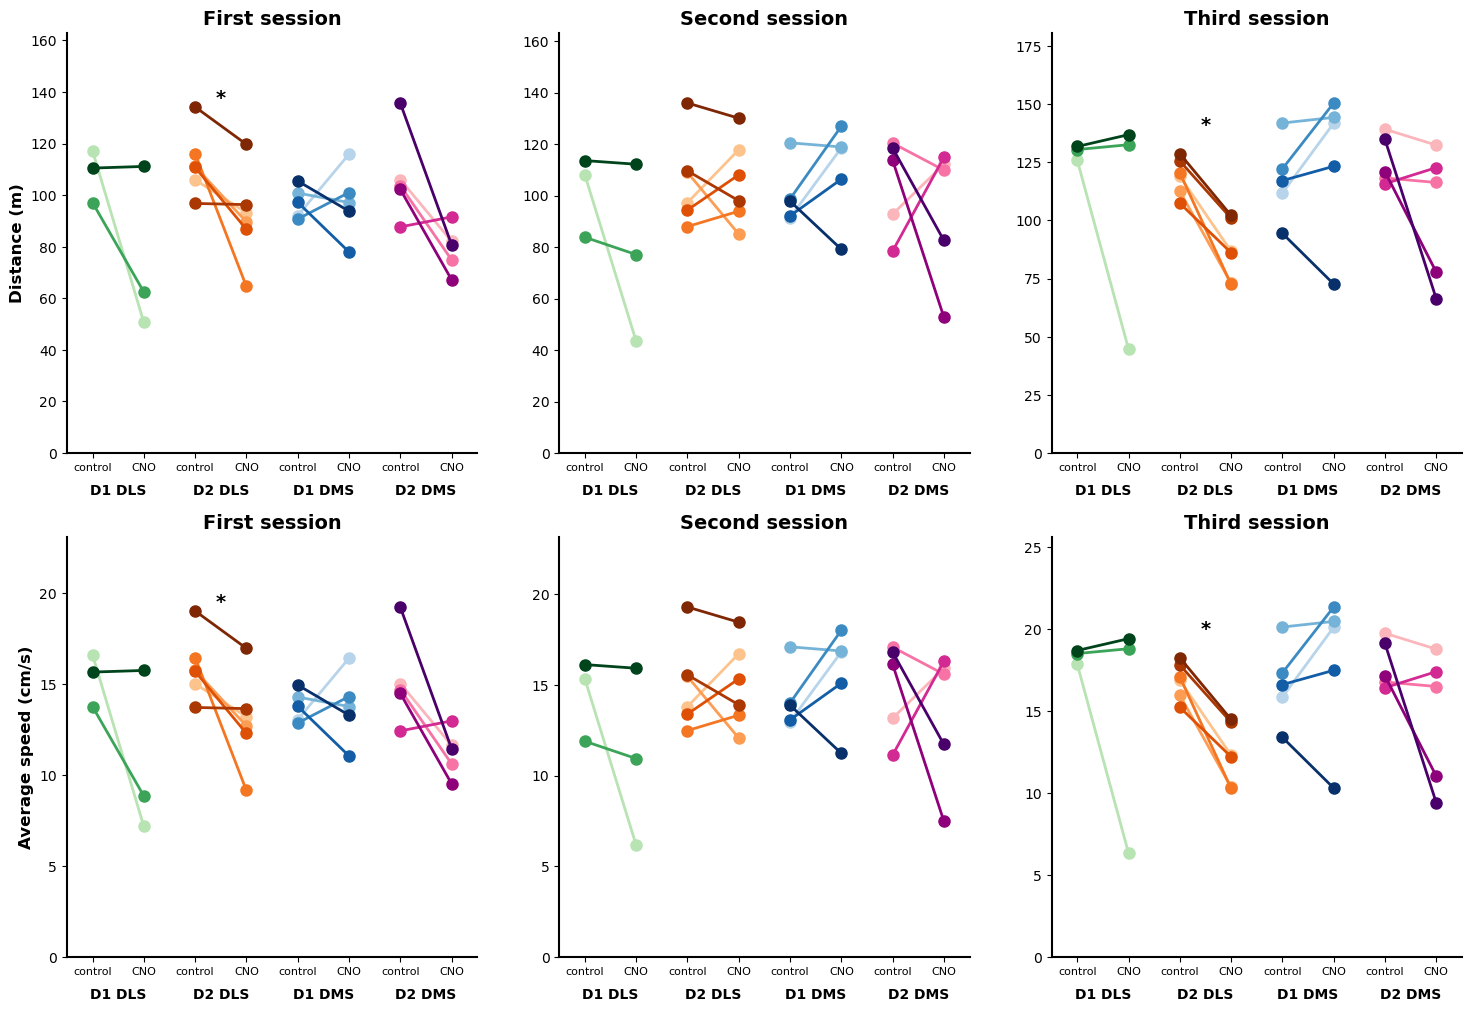

In [140]:
def compare_sessions_by_group(ax, data_dict, groups, session_indices, session_type="first", ylabel=None, ylim=None, quartile_dict=None):
    """
    Compare les valeurs des sessions control et CNO pour chaque groupe sous forme de points reliés.
    
    Parameters:
    - ax: L'axe sur lequel le graphique sera tracé.
    - data_dict: Le dictionnaire contenant les données à comparer (e.g., total_distances).
    - groups: Dictionnaire des groupes de souris à analyser, avec le nom du groupe comme clé et la liste des souris comme valeur.
    - session_type: "first", "second" ou "third", la session à comparer (CNO et control).
    - ylabel: Label de l'axe Y pour le graphique.
    """
    # Extraire les indices de session pour le type de session spécifié
    control_session_index = session_indices.get(f"control_{session_type}")
    CNO_session_index = session_indices.get(f"CNO_{session_type}")
    
    if control_session_index is None or CNO_session_index is None:
        print(f"Erreur : indices de session manquants pour le type '{session_type}'.")
        return
    
    tick_positions = []
    session_labels = []
    group_annotations = []

    # Définir les colormaps pour chaque groupe

    colormaps = {
        "D1 DLS": "Greens",
        "D2 DLS": "Oranges",
        "D1 DMS": "Blues",
        "D2 DMS": "RdPu",
        "D1 dS":"Purples",
        "D2 dS":"OrRd"
    }

    # Calculate Wilcoxon results for each group
    wilcoxon_results = run_wilcoxon_tests(data_dict, groups, session_indices, session_type)
    # print(wilcoxon_results) # Debugging line

    # Déterminer les positions des sessions pour chaque groupe
    for i, (group_name, group_mice) in enumerate(groups.items()):
        group_control_data = []
        group_CNO_data = []
        
        # Extraire les données pour chaque souris du groupe
        for mouse in group_mice:
            if control_session_index in data_dict[mouse] and CNO_session_index in data_dict[mouse]:
                group_control_data.append(data_dict[mouse][control_session_index])
                group_CNO_data.append(data_dict[mouse][CNO_session_index])
            else:
                print(f"Avertissement : données manquantes pour {mouse} dans les sessions de type '{session_type}'")

        # Position des ticks pour le groupe (2 par groupe : "control" et "CNO")
        control_position = i * 2
        CNO_position = i * 2 + 1
        
        # Enregistrer les positions et labels pour chaque session
        tick_positions.extend([control_position, CNO_position])
        session_labels.extend(["control", "CNO"])
        
        # Ajouter une annotation pour le groupe centré entre control et CNO
        group_annotations.append((control_position + 0.5, group_name))  # Centre des positions control et CNO

        # Récupérer la colormap correspondante pour le groupe
        cmap = plt.get_cmap(colormaps.get(group_name))
        colors= cmap(np.linspace(0.3, 1, len(group_mice)))
        
        # Tracer les points pour chaque souris du groupe
        for j in range(len(group_control_data)):
            data = [group_control_data[j], group_CNO_data[j]]
            ax.plot([control_position, CNO_position], data, color=colors[j], linewidth=2, linestyle='-', marker='o', markersize=8)

        p_value = wilcoxon_results.get(group_name, {}).get('p_value', None)
        # print(f"Group: {group_name}, p-value: {p_value}") # Debugging line
        if p_value is not None and p_value < 0.05:
            y_limit_upper = ax.get_ylim()[1]
            star_position_y = y_limit_upper * 0.98
            ax.text(control_position+0.5, star_position_y, '*', ha='center', fontsize=14, fontweight='bold')
        
        if quartile_dict is not None:
            for j, mouse in enumerate(group_mice):
                if mouse in quartile_dict and f"control_{session_type}" in quartile_dict[mouse] and f"CNO_{session_type}" in quartile_dict[mouse]:
                    q25, q75 = quartile_dict[mouse][f"control_{session_type}"], quartile_dict[mouse][f"CNO_{session_type}"]
                    # Tracer les quartiles sous forme de lignes (Q25 et Q75)
                    ax.plot([control_position, CNO_position], [q25[0], q75[0]], color='black', linestyle='--', alpha=0.5)
    
    # Ajouter des titres et des labels
    ax.set_title(f'{session_type.capitalize()} session', fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    # ax.set_xlabel('Sessions', fontsize=12, fontweight='bold')

    # Définir les positions et labels des ticks sur l'axe X (pour chaque session)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(session_labels)

    # Limiter l'axe Y pour ajouter de la marge
    all_data = [value for group_mice in groups.values() for mouse in group_mice
                for value in [data_dict[mouse].get(control_session_index), data_dict[mouse].get(CNO_session_index)]
                if value is not None]
    ax.set_xlim(-0.5, len(groups) * 2 - 0.5)
    if ylim==None:
        ax.set_ylim(0, max(all_data) * 1.2)
    else:
        ax.set_ylim(ylim)

    # Ajouter les annotations pour les groupes sous chaque paire de ticks
    for pos, group_name in group_annotations:
        ax.annotate(group_name, xy=(pos, -0.1), xycoords=('data', 'axes fraction'), ha='center', 
                    fontsize=10, fontweight='bold')
    
    # Suppression des grilles pour un look plus propre
    ax.grid(False)
    
    # Améliorer la lisibilité des axes
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Utiliser gridspec_kw pour ajuster l'espacement vertical
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'hspace': 0.2})

# Comparer les sessions en appelant la fonction pour chaque paire
compare_sessions_by_group(axs[0, 0], total_distances, groups, session_indices, session_type="first", ylabel='Distance (m)')
compare_sessions_by_group(axs[0, 1], total_distances, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_distances, groups, session_indices, session_type="third", ylabel=None)
compare_sessions_by_group(axs[1, 0], average_speeds, groups, session_indices, session_type="first", ylabel='Average speed (cm/s)')
compare_sessions_by_group(axs[1, 1], average_speeds, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], average_speeds, groups, session_indices, session_type="third", ylabel=None)

plt.tight_layout()
plt.show()

### First : comparison of parameter regarding all epochs types

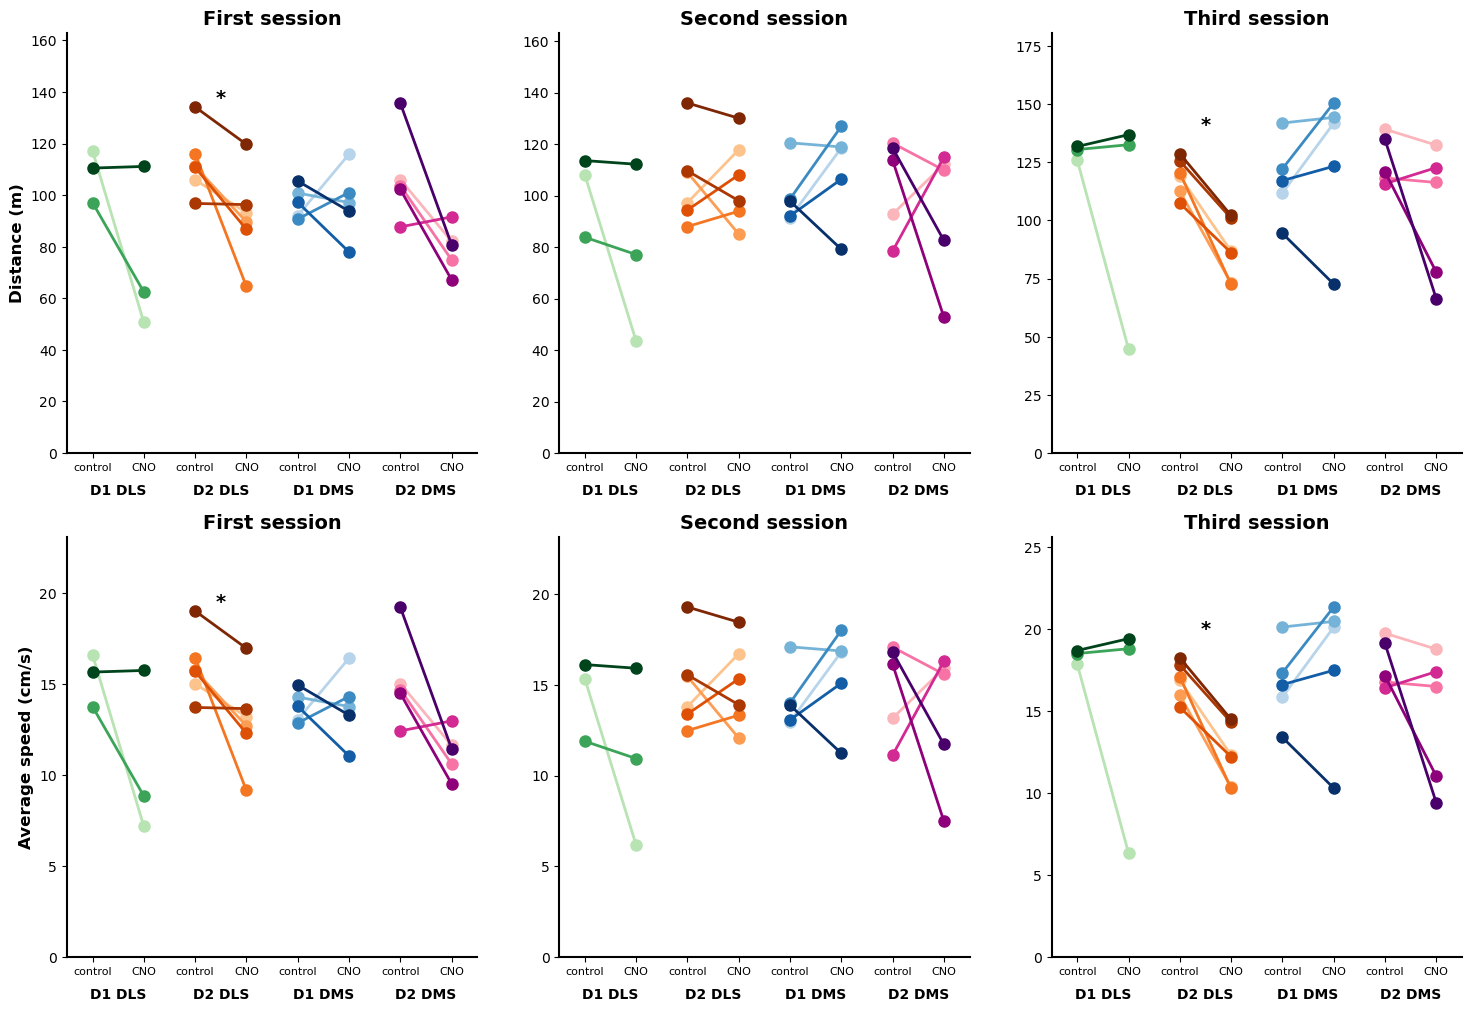

In [141]:
# Exemple d'utilisation avec 2 lignes et 2 colonnes

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'hspace': 0.2})

compare_sessions_by_group(axs[0, 0], total_distances, groups, session_indices, session_type="first", ylabel='Distance (m)')
compare_sessions_by_group(axs[0, 1], total_distances, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_distances, groups, session_indices, session_type="third", ylabel=None)
compare_sessions_by_group(axs[1, 0], average_speeds, groups, session_indices, session_type="first", ylabel='Average speed (cm/s)')
compare_sessions_by_group(axs[1, 1], average_speeds, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], average_speeds, groups, session_indices, session_type="third", ylabel=None)

plt.show()


In [142]:
# Time/distance zones
# TO DO : add it in batch_trajectory processing

### Second : QT metrics

In [143]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_QT_dict = {}
total_distance_QT_dict = {}
meanspeed_QT_dict = {}
maxspeed_QT_dict = {}

for mouse in mice_list:
    total_time_QT_dict[mouse] = {}
    total_distance_QT_dict[mouse] = {}
    meanspeed_QT_dict[mouse] = {}
    maxspeed_QT_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

            total_time_QT = 0
            total_distance_QT = 0
            meanspeed_QT = []
            maxspeed_QT = []

            for run in runs_around_tower_dict[mouse][session_index]:
                start_index, end_index = run[0][0], run[0][1]
                run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
                run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
                run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
                distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

                # Accumulate metrics
                total_time_QT += run_duration
                total_distance_QT += distance_ran
                meanspeed_QT.append(distance_ran / run_duration)
                maxspeed_QT.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

            # Store results for this session in the dictionaries
            total_time_QT_dict[mouse][session_index] = total_time_QT
            total_distance_QT_dict[mouse][session_index] = total_distance_QT
            meanspeed_QT_dict[mouse][session_index] = np.mean(meanspeed_QT)
            maxspeed_QT_dict[mouse][session_index] = np.max(maxspeed_QT)

print(maxspeed_QT_dict)


{'MOU3867': {0: 34.19831402745632, 1: 47.22041532112843, 2: 34.34229466175652, 3: 48.61815900750431, 4: 47.81873914115231, 5: 52.199762958462614, 6: 62.030226135252555, 7: 45.156641587420786, 8: 72.29363104115339, 9: 57.350397358972565, 10: 62.05301475830716, 11: 57.55142912339538, 12: 61.778464043959815, 13: 67.49678823602488, 14: 60.20259806035725, 15: 68.0868214776489, 16: 65.7160881072611, 17: 69.1625763915532, 18: 54.08765461684426, 19: 57.21798139695779, 20: 51.65230117267671, 21: 71.27211605690007, 22: 75.51395900875968, 23: 75.68546422868693, 24: 72.25157340756077, 25: 60.52375795009016, 26: 59.435578378509135, 27: 56.96331707906626, 28: 62.2908089217984, 29: 83.67739032018372, 30: 50.001673935932956, 31: 54.12243775707023, 32: 71.4511496560304, 33: 67.92088374589018, 34: 60.57754497719303, 35: 59.87153098734379, 36: 78.53128138877776, 37: 56.953000200000105, 38: 77.35143728294847, 39: 61.214565564263694, 40: 68.15174647931667, 41: 80.30984572643803, 42: 51.74737876731672, 43: 

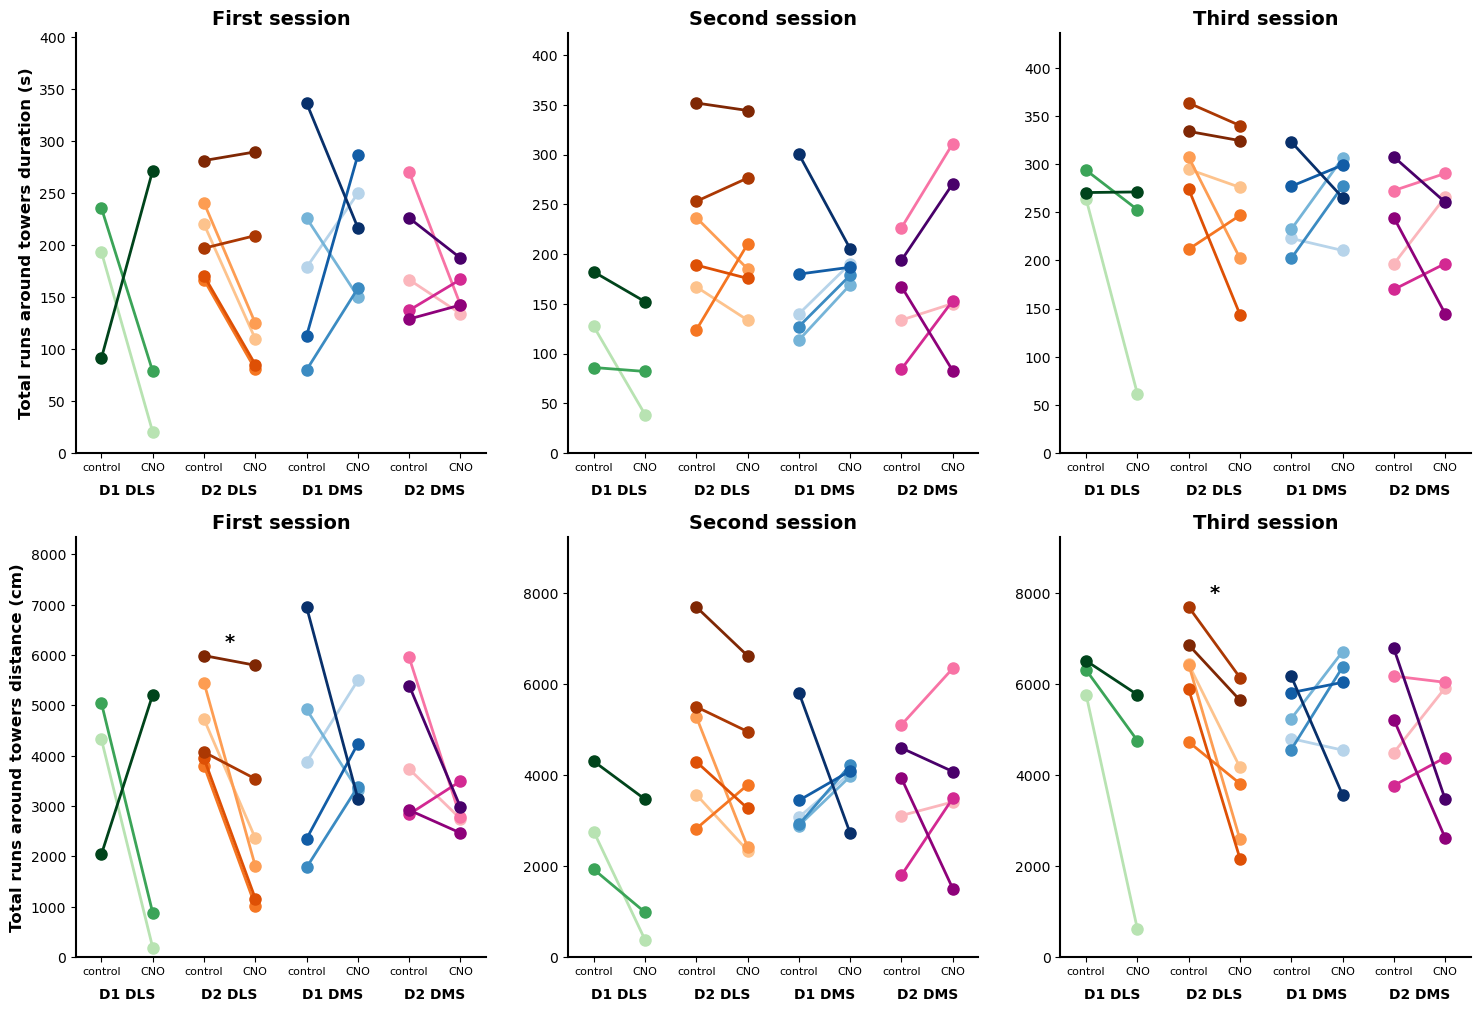

In [144]:
# total runs around towers duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_QT_dict, groups, session_indices, session_type="first", ylabel='Total runs around towers duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_QT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_QT_dict, groups, session_indices, session_type="first", ylabel='Total runs around towers distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_QT_dict, groups, session_indices, session_type="third", ylabel=None)

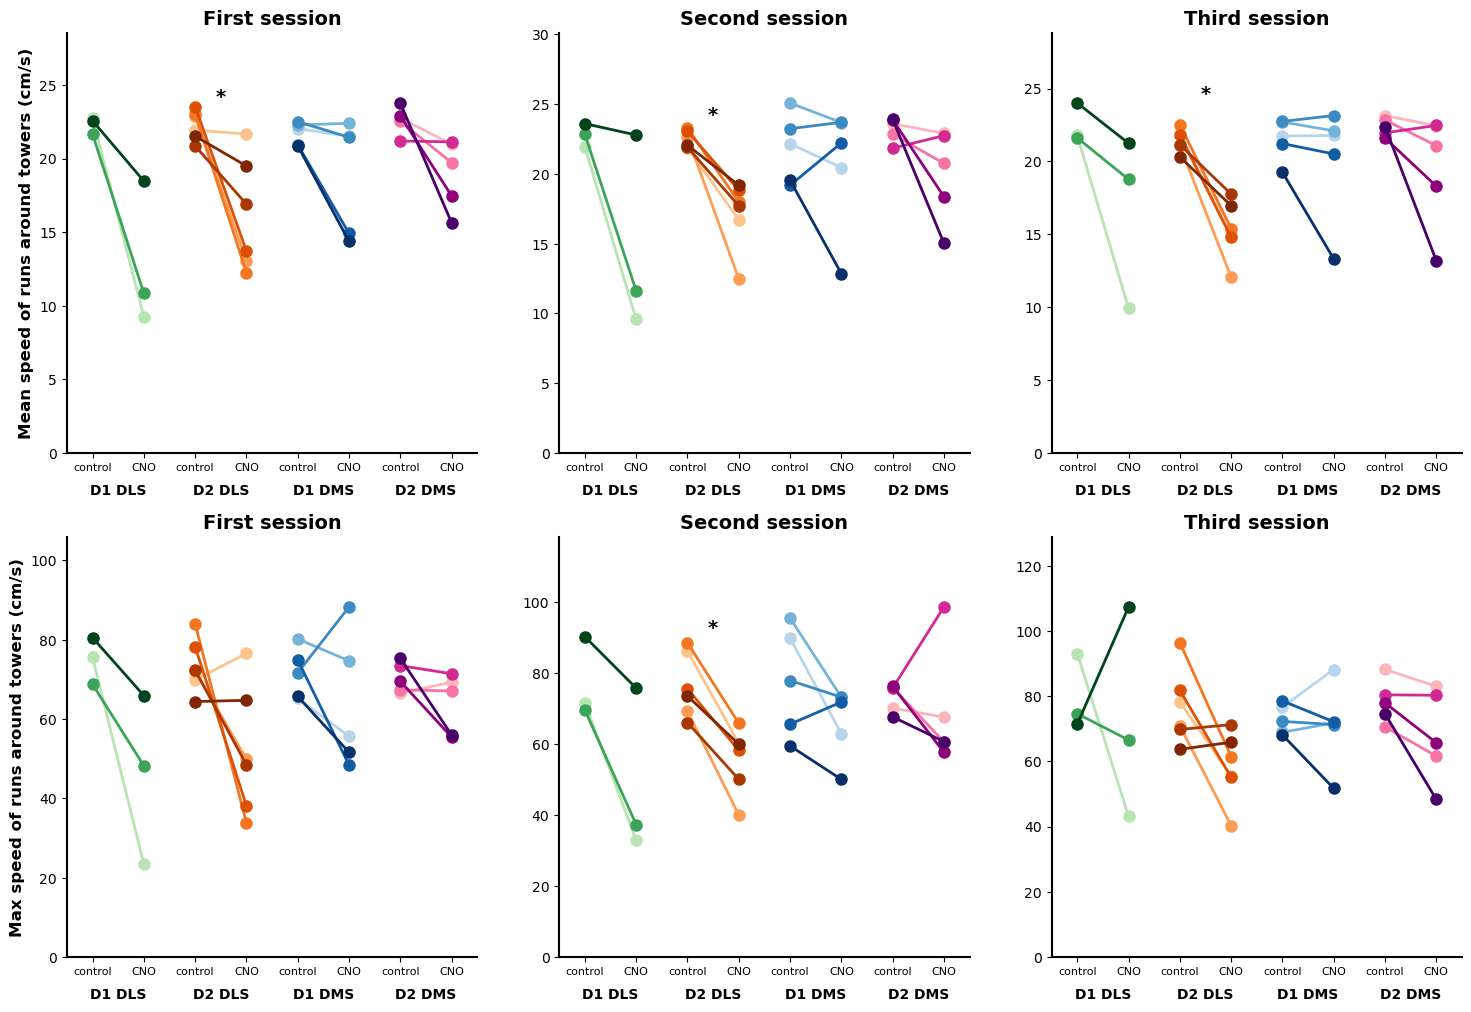

In [145]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_QT_dict, groups, session_indices, session_type="first", ylabel='Mean speed of runs around towers (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_QT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_QT_dict, groups, session_indices, session_type="first", ylabel='Max speed of runs around towers (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_QT_dict, groups, session_indices, session_type="third", ylabel=None)


In [186]:
# Dictionnaries of CW/CCW/rewarded/unrewarded/total

total_QT_dict = {}
total_QT_rewarded_dict = {}
total_QT_unrewarded_dict = {}
total_CW_dict = {}
total_CCW_dict = {}
ratio_CW_CCW_dict = {}
percentage_rewarded_dict = {}

for mouse in mice_list:
    
    total_QT_dict[mouse] = {}
    total_QT_rewarded_dict[mouse] = {}
    total_QT_unrewarded_dict[mouse] = {}
    total_CW_dict[mouse] = {}
    total_CCW_dict[mouse] = {}
    ratio_CW_CCW_dict[mouse] = {}
    percentage_rewarded_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_CW_rewarded = run_around_tower_results_dict[mouse][session_index]['All']['rewarded_CW']
        total_CCW_rewarded = run_around_tower_results_dict[mouse][session_index]['All']['rewarded_CCW']
        total_CW = run_around_tower_results_dict[mouse][session_index]['All']['total_CW']
        total_CCW = run_around_tower_results_dict[mouse][session_index]['All']['total_CCW']
        
        total_QT = total_CW + total_CCW
        total_QT_rewarded = total_CW_rewarded + total_CCW_rewarded
        total_QT_unrewarded = total_QT - total_QT_rewarded
        ratio_CW_CCW = (total_CW - total_CCW) / total_QT
        percentage_rewarded = round((total_QT_rewarded / total_QT) * 100, 2)

        total_QT_dict[mouse][session_index] = total_QT
        total_QT_rewarded_dict[mouse][session_index] = total_QT_rewarded
        total_QT_unrewarded_dict[mouse][session_index] = total_QT_unrewarded
        total_CW_dict[mouse][session_index] = total_CW
        total_CCW_dict[mouse][session_index] = total_CCW
        ratio_CW_CCW_dict[mouse][session_index] = ratio_CW_CCW
        percentage_rewarded_dict[mouse][session_index] = percentage_rewarded

print(percentage_rewarded_dict)
# print(run_around_tower_results_dict['control_first']['All'])


{'MOU3867': {0: 58.82, 1: 55.56, 2: 100.0, 3: 100.0, 4: 70.0, 5: 92.51, 6: 53.71, 7: 92.11, 8: 64.04, 9: 88.18, 10: 69.4, 11: 84.18, 12: 43.35, 13: 61.76, 14: 48.2, 15: 65.17, 16: 57.51, 17: 80.0, 18: 57.88, 19: 71.76, 20: 80.56, 21: 80.9, 22: 68.96, 23: 83.16, 24: 75.57, 25: 84.86, 26: 79.4, 27: 80.24, 28: 77.68, 29: 76.83, 30: 31.07, 31: 78.37, 32: 71.54, 33: 81.27, 34: 38.13, 35: 41.4, 36: 37.67, 37: 40.96, 38: 40.34, 39: 47.08, 40: 52.15, 41: 44.33, 42: 17.57, 43: 54.93, 44: 46.65, 45: 56.93}, 'MOU4551': {0: 57.14, 1: 50.0, 2: 100.0, 3: 100.0, 4: 36.59, 5: 65.79, 6: 48.39, 7: 80.88, 8: 39.84, 9: 72.97, 10: 47.67, 11: 73.98, 12: 53.96, 13: 61.9, 14: 60.56, 15: 74.22, 16: 64.77, 17: 69.23, 18: 64.16, 19: 83.44, 20: 60.76, 21: 55.3, 22: 72.46, 23: 80.56, 24: 73.52, 25: 79.35, 26: 58.72, 27: 86.21, 28: 65.16, 29: 88.21, 30: 35.16, 31: 77.09, 32: 65.49, 33: 85.52, 34: 32.19, 35: 39.96, 36: 52.86, 37: 50.82, 38: 46.84, 39: 50.0, 40: 47.09, 41: 55.33, 42: 29.37, 43: 41.03, 44: 48.08, 45: 

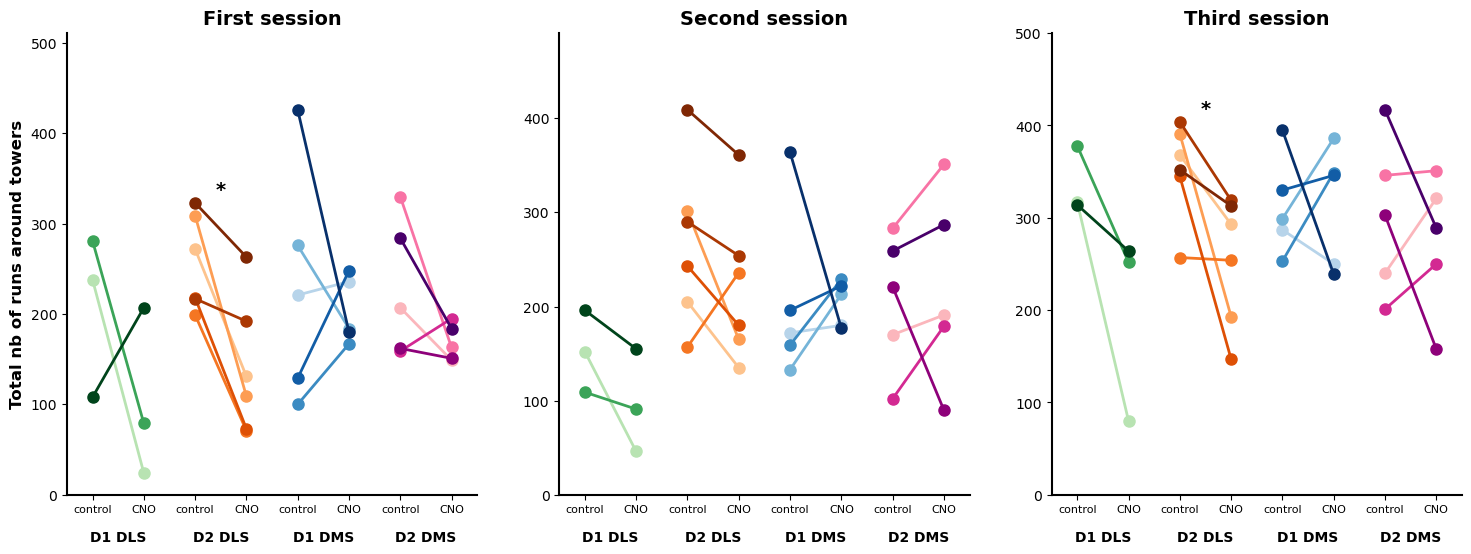

In [147]:
# Total nb of QT

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

compare_sessions_by_group(axs[0], total_QT_dict, groups, session_indices, session_type="first", ylabel='Total nb of runs around towers')
compare_sessions_by_group(axs[1], total_QT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[2], total_QT_dict, groups, session_indices, session_type="third", ylabel=None)

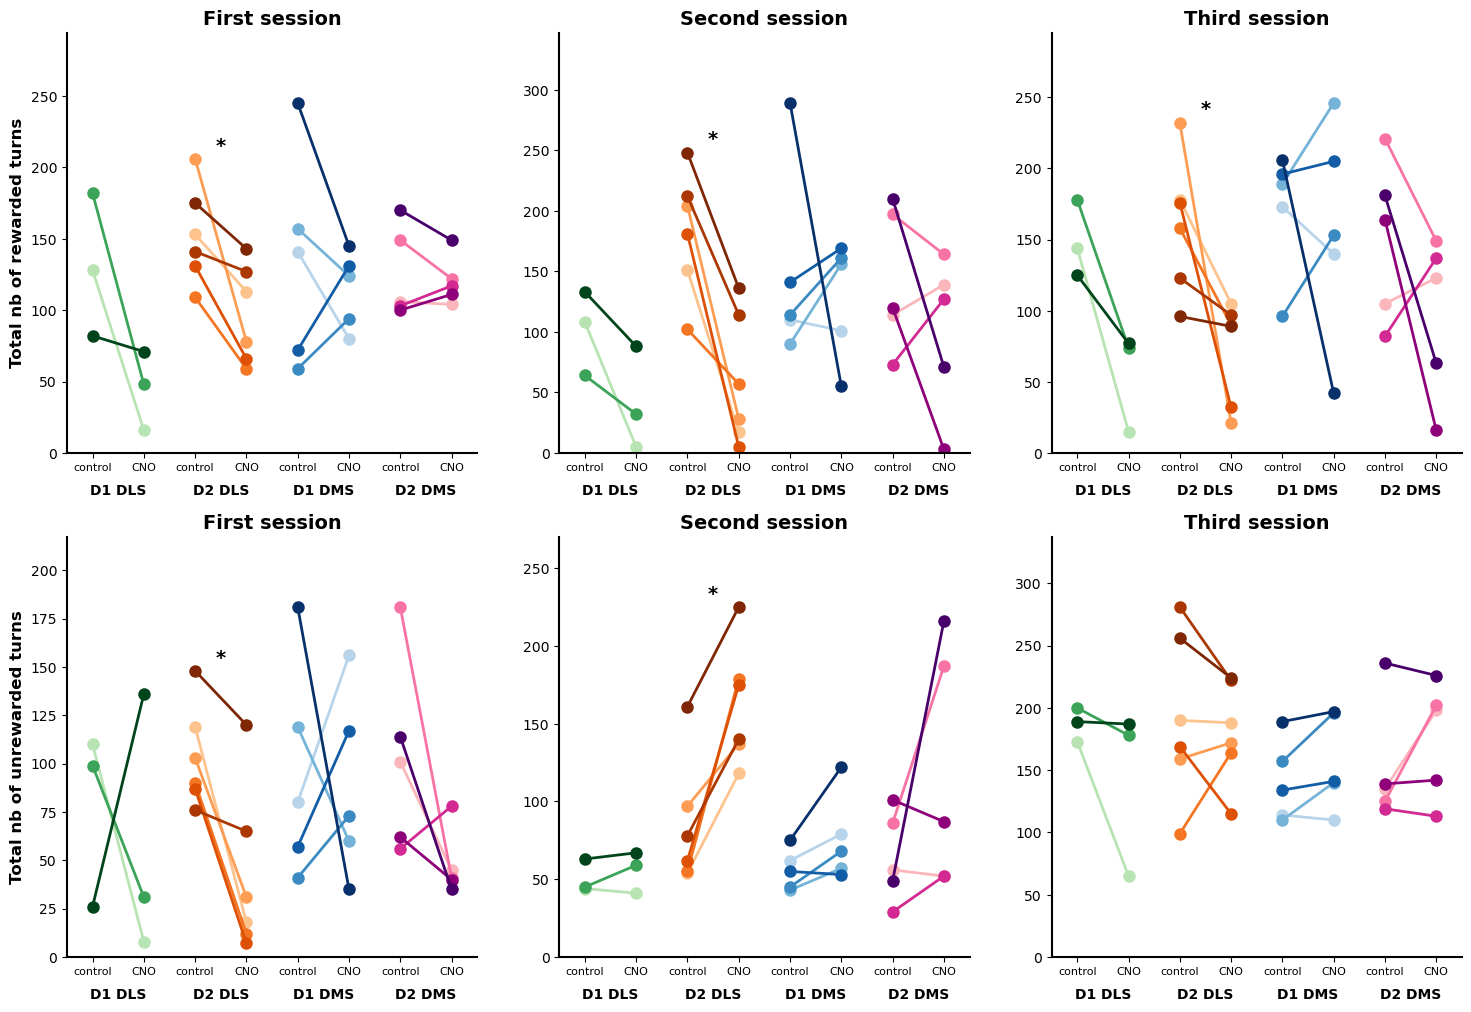

In [148]:
# rewarded, unrewarded

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_QT_rewarded_dict, groups, session_indices, session_type="first", ylabel='Total nb of rewarded turns')
compare_sessions_by_group(axs[0, 1], total_QT_rewarded_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_QT_rewarded_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_QT_unrewarded_dict, groups, session_indices, session_type="first", ylabel='Total nb of unrewarded turns')
compare_sessions_by_group(axs[1, 1], total_QT_unrewarded_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_QT_unrewarded_dict, groups, session_indices, session_type="third", ylabel=None)


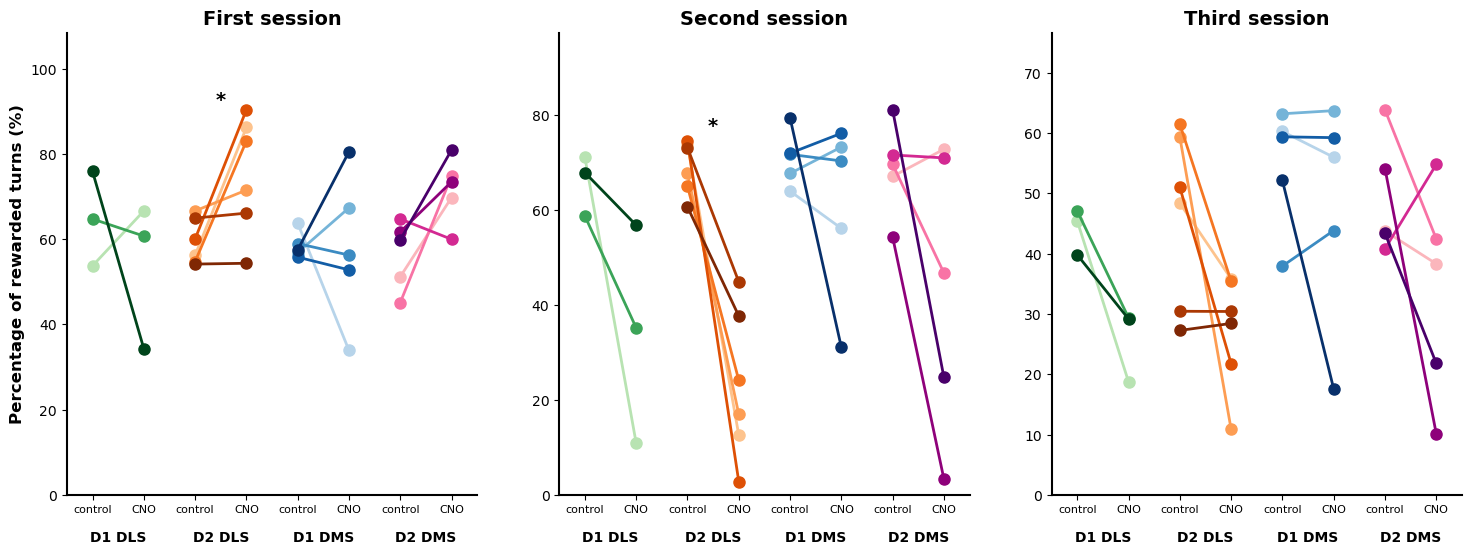

In [189]:
# Percentage of rewarded turns

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

compare_sessions_by_group(axs[0], percentage_rewarded_dict, groups, session_indices, session_type="first", ylabel='Percentage of rewarded turns (%)')
compare_sessions_by_group(axs[1], percentage_rewarded_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[2], percentage_rewarded_dict, groups, session_indices, session_type="third", ylabel=None)


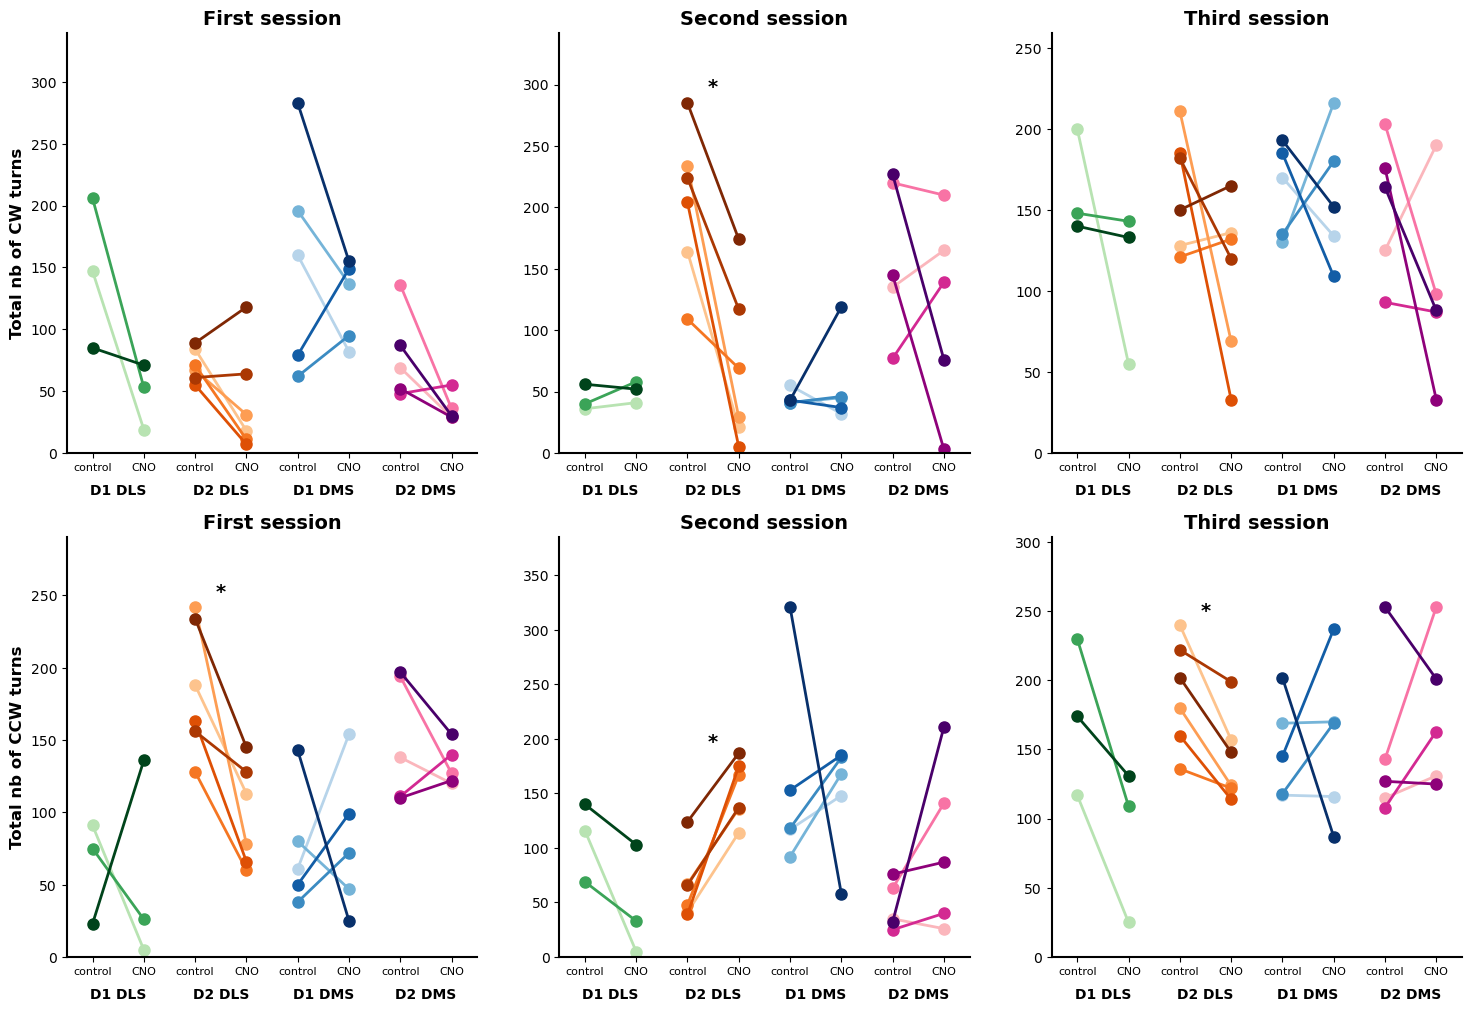

In [149]:
# nb CW / CCW

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_CW_dict, groups, session_indices, session_type="first", ylabel='Total nb of CW turns')
compare_sessions_by_group(axs[0, 1], total_CW_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_CW_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_CCW_dict, groups, session_indices, session_type="first", ylabel='Total nb of CCW turns')
compare_sessions_by_group(axs[1, 1], total_CCW_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_CCW_dict, groups, session_indices, session_type="third", ylabel=None)

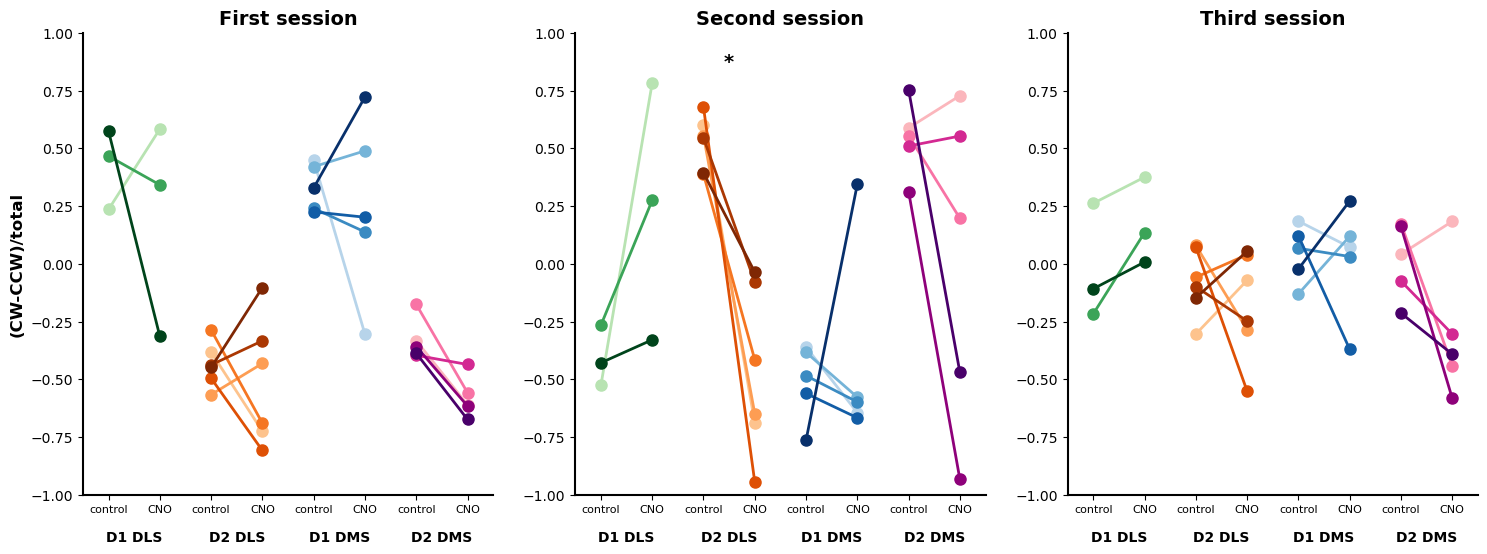

In [177]:
# ratio CW/CCW
# TO DO : add a ylim argument in function so it can go below 0

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

compare_sessions_by_group(axs[0], ratio_CW_CCW_dict, groups, session_indices, session_type="first", ylabel='(CW-CCW)/total', ylim=(-1,1))
compare_sessions_by_group(axs[1], ratio_CW_CCW_dict, groups, session_indices, session_type="second", ylabel=None, ylim=(-1,1))
compare_sessions_by_group(axs[2], ratio_CW_CCW_dict, groups, session_indices, session_type="third", ylabel=None, ylim=(-1,1))


In [151]:
# Stereotypie (analyse David) for later

### Third : BT metrics

In [152]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_BT_dict = {}
total_distance_BT_dict = {}
meanspeed_BT_dict = {}
maxspeed_BT_dict = {}

for mouse in mice_list:
    total_time_BT_dict[mouse] = {}
    total_distance_BT_dict[mouse] = {}
    meanspeed_BT_dict[mouse] = {}
    maxspeed_BT_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_time_BT = 0
        total_distance_BT = 0
        meanspeed_BT = []
        maxspeed_BT = []

        for run in runs_between_towers_dict[mouse][session_index]:
            start_index, end_index = run[0][0], run[0][1]
            run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
            distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

            # Accumulate metrics
            total_time_BT += run_duration
            total_distance_BT += distance_ran
            meanspeed_BT.append(distance_ran / run_duration)
            maxspeed_BT.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

        # Store results for this session in the dictionaries
        total_time_BT_dict[mouse][session_index] = total_time_BT
        total_distance_BT_dict[mouse][session_index] = total_distance_BT
        meanspeed_BT_dict[mouse][session_index] = np.mean(meanspeed_BT)
        maxspeed_BT_dict[mouse][session_index] = np.max(maxspeed_BT)

print(maxspeed_BT_dict)

{'MOU3867': {0: 40.493228367028465, 1: 43.771475045010874, 2: 47.68177304082125, 3: 68.51917693741548, 4: 51.22210330719575, 5: 54.00150049103584, 6: 48.8347093843957, 7: 66.27651253351931, 8: 55.368644532052244, 9: 54.66746940506273, 10: 54.56552427859414, 11: 57.19532599553435, 12: 60.60189595534, 13: 46.76075102840947, 14: 56.682722233840465, 15: 52.19489112525784, 16: 59.22414293894632, 17: 63.452966106890514, 18: 57.369280633360546, 19: 61.068822340465395, 20: 48.07601626451714, 21: 56.27785575012359, 22: 62.80496474927227, 23: 62.296420138026946, 24: 71.24267170714222, 25: 66.74674837802037, 26: 72.0033138237608, 27: 62.42057433260995, 28: 66.63607547046098, 29: 63.89242130689288, 30: 51.41906524212497, 31: 59.57707045507423, 32: 60.02596114760464, 33: 69.39691581497665, 34: 61.10904448364717, 35: 59.8723977769186, 36: 61.28282167583511, 37: 60.3768661453657, 38: 64.74382689564086, 39: 58.64105290236679, 40: 62.23708487572492, 41: 58.626132847737566, 42: 44.079083805779035, 43: 6

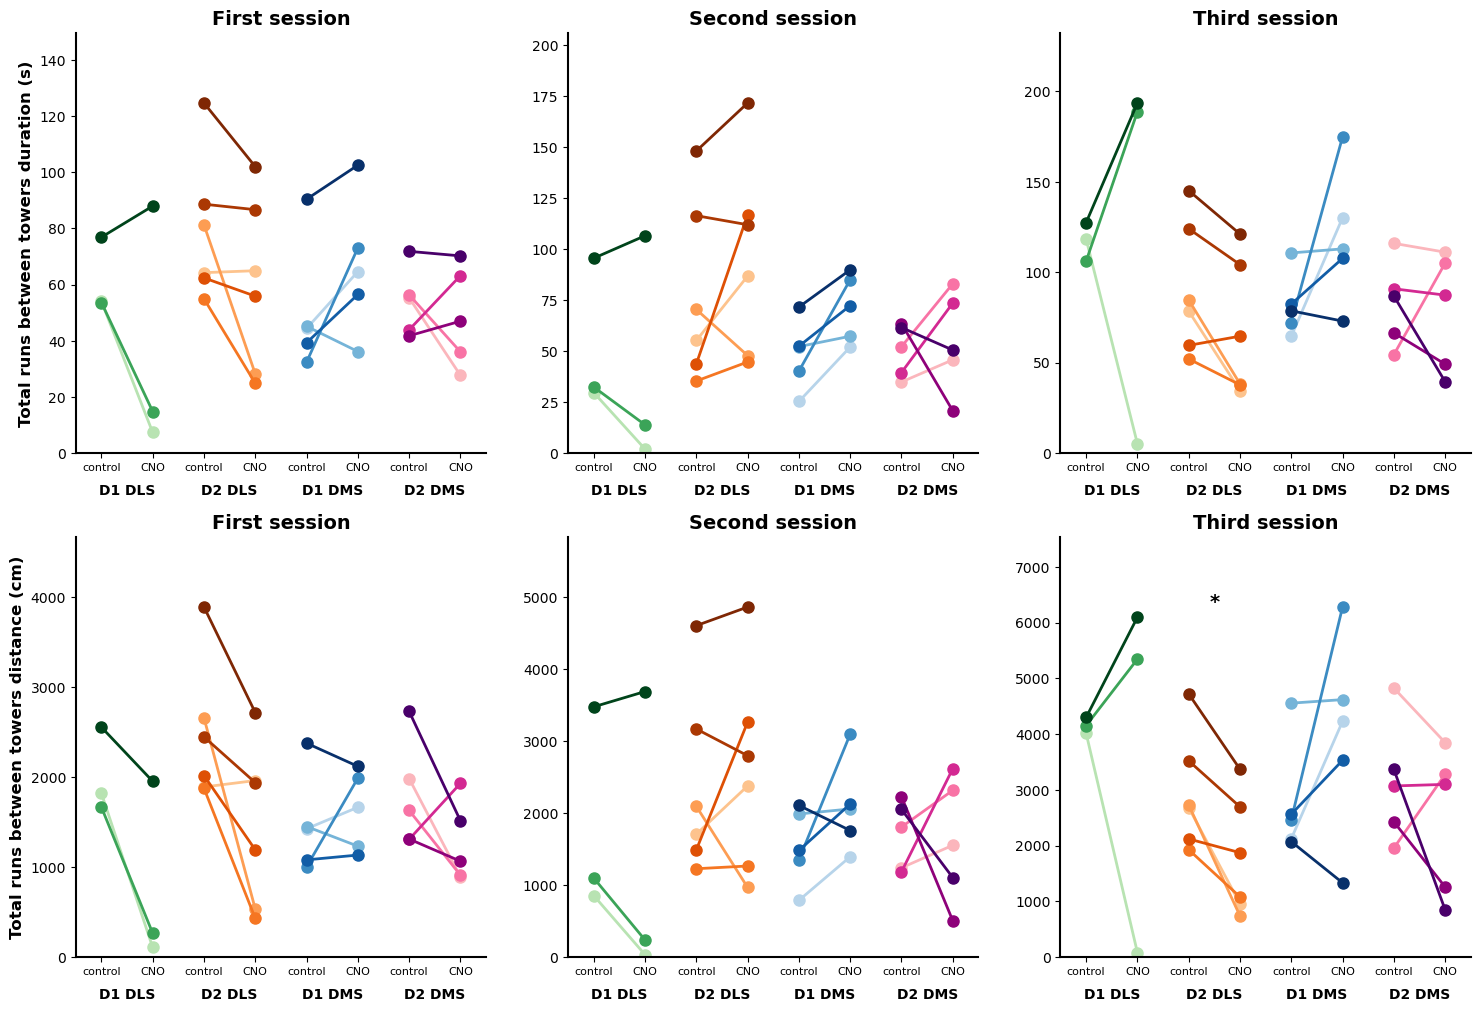

In [153]:
# total runs between towers duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_BT_dict, groups, session_indices, session_type="first", ylabel='Total runs between towers duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_BT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_BT_dict, groups, session_indices, session_type="first", ylabel='Total runs between towers distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_BT_dict, groups, session_indices, session_type="third", ylabel=None)

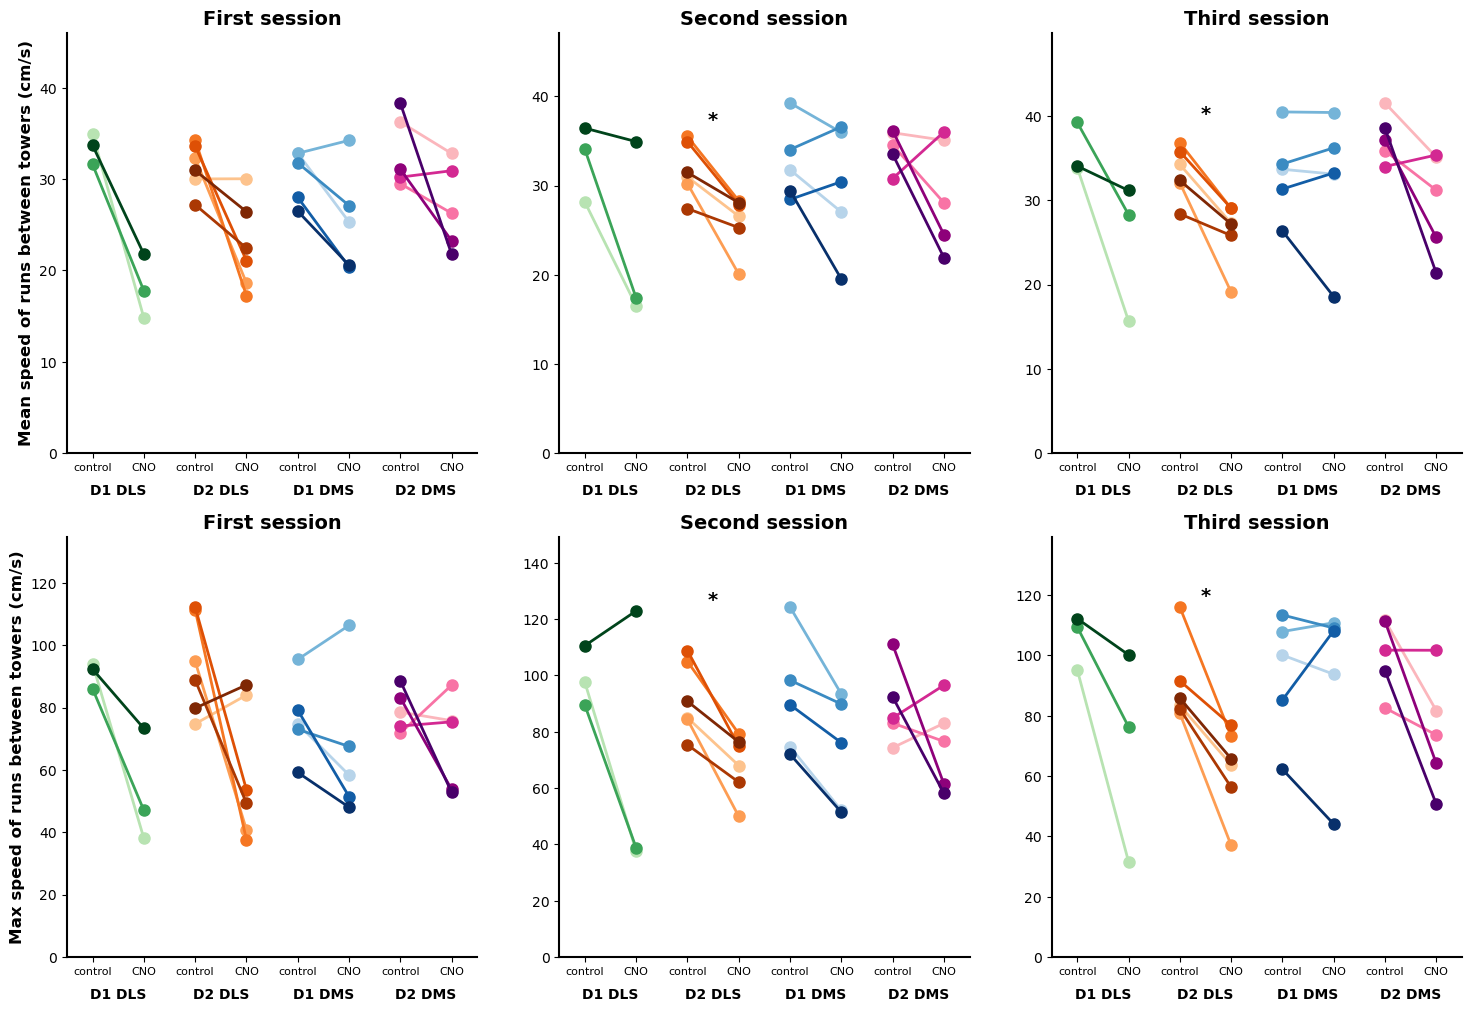

In [154]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_BT_dict, groups, session_indices, session_type="first", ylabel='Mean speed of runs between towers (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_BT_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_BT_dict, groups, session_indices, session_type="first", ylabel='Max speed of runs between towers (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_BT_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_BT_dict, groups, session_indices, session_type="third", ylabel=None)

In [155]:
# Function get_metrics_of_run_type à créer peut-être ici

### Fourth : exploratory runs metrics

In [156]:
# distance, time, mean speed, max speed
# Initialize counters and lists for run analysis

total_time_ER_dict = {}
total_distance_ER_dict = {}
meanspeed_ER_dict = {}
maxspeed_ER_dict = {}

for mouse in mice_list:

    total_time_ER_dict[mouse] = {}
    total_distance_ER_dict[mouse] = {}
    meanspeed_ER_dict[mouse] = {}
    maxspeed_ER_dict[mouse] = {}

    for session_index, session_name in enumerate(session_list[mouse]):

        total_time_ER = 0
        total_distance_ER = 0
        meanspeed_ER = []
        maxspeed_ER = []

        for run in exploratory_runs_dict[mouse][session_index]:
            start_index, end_index = run[0][0], run[0][1]
            run_X_position = X_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_Y_position = Y_positions_dict[mouse][session_index][start_index:end_index + 1]
            run_duration = traject_time_dict[mouse][session_index][end_index] - traject_time_dict[mouse][session_index][start_index]
            distance_ran = np.sum(distances_dict[mouse][session_index][start_index:end_index])

            # Accumulate metrics
            total_time_ER += run_duration
            total_distance_ER += distance_ran
            meanspeed_ER.append(distance_ran / run_duration)
            maxspeed_ER.append(np.max(speeds_dict[mouse][session_index][start_index:end_index]))

        # Store results for this session in the dictionaries
        total_time_ER_dict[mouse][session_index] = total_time_ER
        total_distance_ER_dict[mouse][session_index] = total_distance_ER
        meanspeed_ER_dict[mouse][session_index] = np.mean(meanspeed_ER)
        maxspeed_ER_dict[mouse][session_index] = np.max(maxspeed_ER)


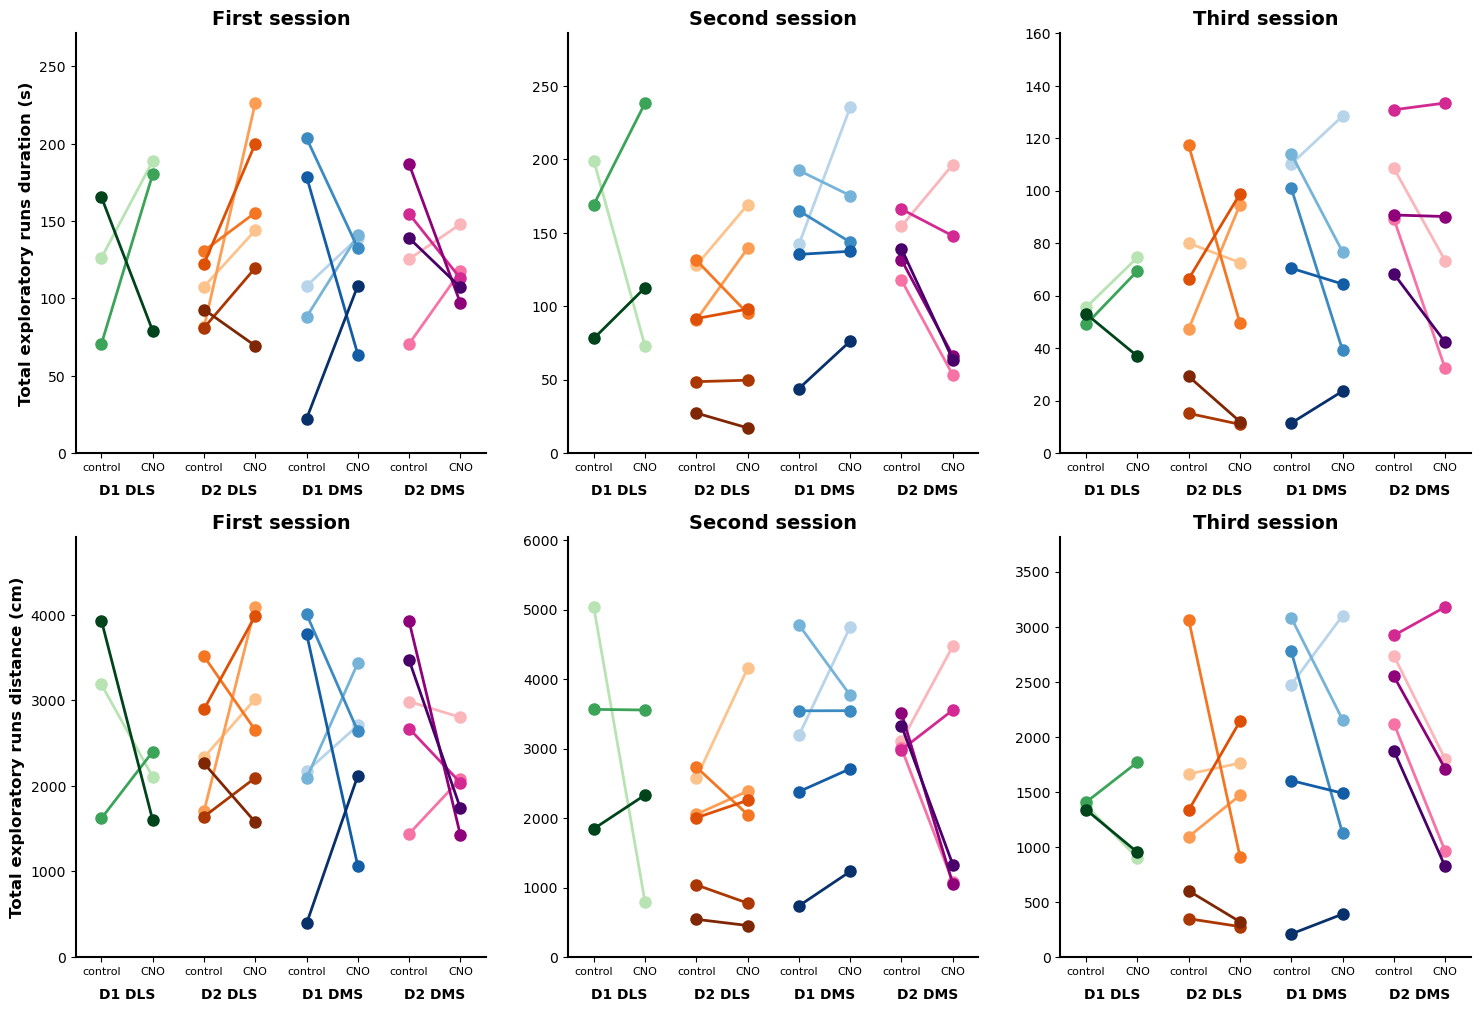

In [157]:
# total explo runs duration/distance

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], total_time_ER_dict, groups, session_indices, session_type="first", ylabel='Total exploratory runs duration (s)')
compare_sessions_by_group(axs[0, 1], total_time_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], total_time_ER_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], total_distance_ER_dict, groups, session_indices, session_type="first", ylabel='Total exploratory runs distance (cm)')
compare_sessions_by_group(axs[1, 1], total_distance_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], total_distance_ER_dict, groups, session_indices, session_type="third", ylabel=None)

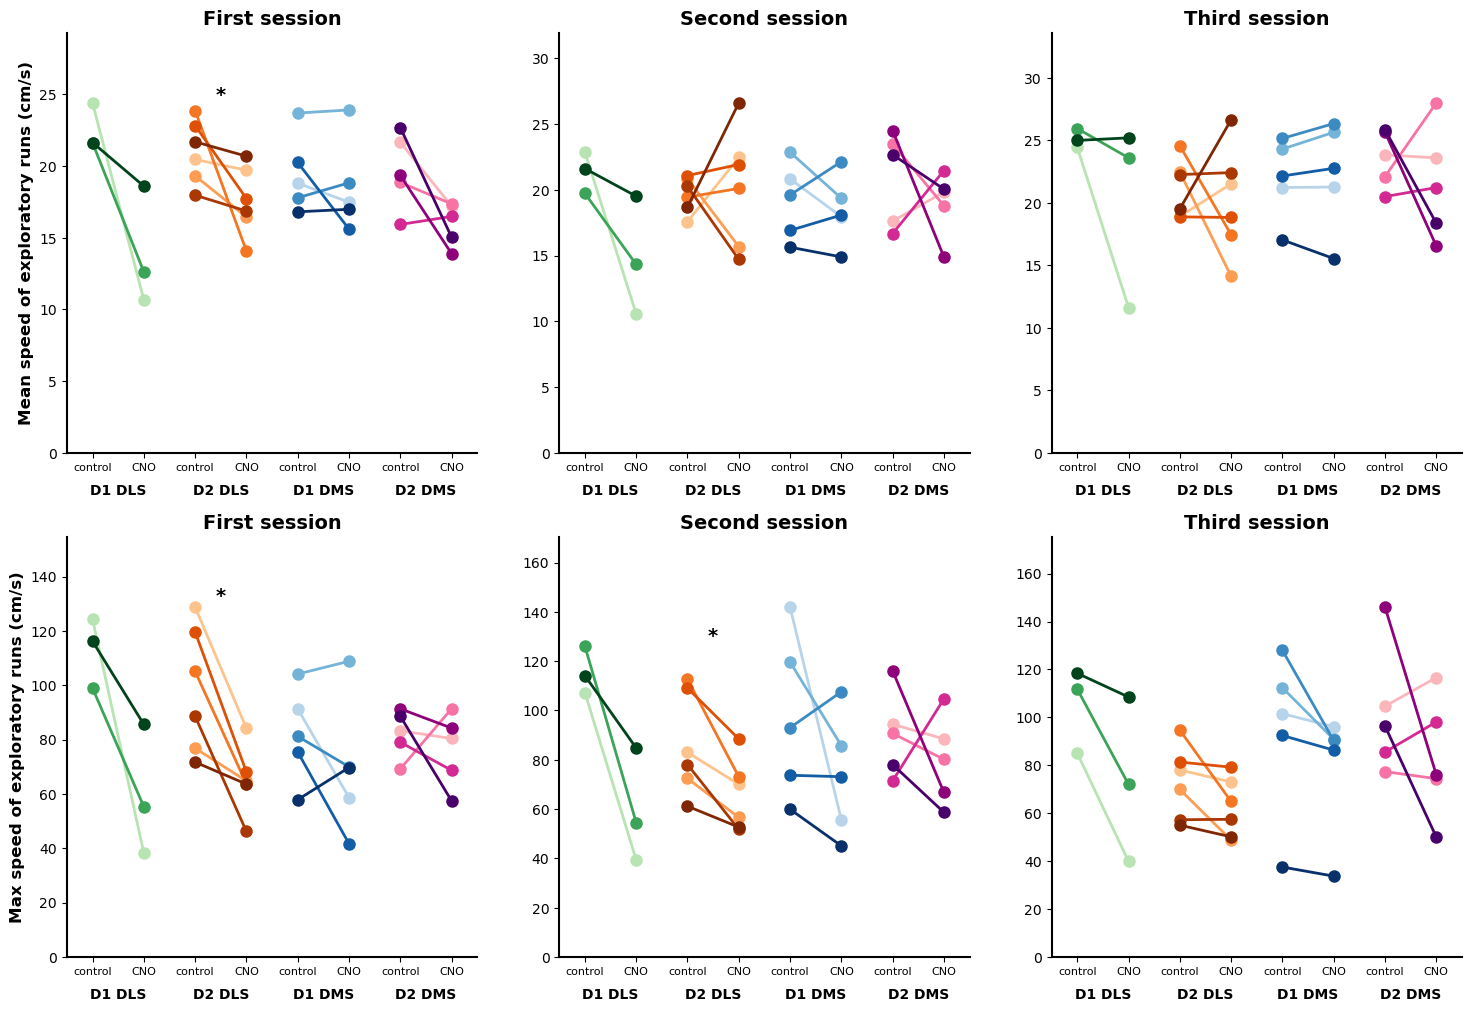

In [158]:
# mean speed, max speed

# Créer une figure avec 2 lignes et 2 colonnes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

compare_sessions_by_group(axs[0, 0], meanspeed_ER_dict, groups, session_indices, session_type="first", ylabel='Mean speed of exploratory runs (cm/s)')
compare_sessions_by_group(axs[0, 1], meanspeed_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[0, 2], meanspeed_ER_dict, groups, session_indices, session_type="third", ylabel=None)

compare_sessions_by_group(axs[1, 0], maxspeed_ER_dict, groups, session_indices, session_type="first", ylabel='Max speed of exploratory runs (cm/s)')
compare_sessions_by_group(axs[1, 1], maxspeed_ER_dict, groups, session_indices, session_type="second", ylabel=None)
compare_sessions_by_group(axs[1, 2], maxspeed_ER_dict, groups, session_indices, session_type="third", ylabel=None)

# New analysis :
## 1. Analyse du biais directionnel et apprentissage de la règle procédurale
### Temps d’adaptation à la règle du jour : 

Quantifie le temps nécessaire aux animaux pour réaliser leur premier quart de tour correct au début de chaque session. 

Checker un palier de 10% (exemple arbitraire) de rewards atteint.

In [160]:
# Example of how to find a key in runs_around_tower_dict

print(runs_around_tower_dict["MOU3867"][0][0][3]['Rewarded'])

for mouse in mice_list:
    for session_index, session_name in enumerate(session_list[mouse]):
        for run in runs_around_tower_dict[mouse][session_index]:
            print(run[3]['Rewarded'])

False
False
False
False
False
True
False
True
True
True
True
True
True
False
True
False
True
True
False
True
True
True
True
False
False
True
False
False
True
False
False
False
True
False
True
True
True
True
False
False
False
True
False
True
True
True
True
False
False
False
False
True
True
True
True
True
False
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

In [161]:
# Dictionnary to stock rewarded runs around tower
rewarded_QT_dict = {}

# Parcourir chaque souris dans la liste des souris
for mouse in mice_list:
    rewarded_QT_dict[mouse] = {}  # Initialiser le sous-dictionnaire pour chaque souris
    
    # Parcourir chaque session pour cette souris
    for session_index, session_name in enumerate(session_list[mouse]):
        # Filtrer les runs récompensés pour cette session
        rewarded_runs = [run for run in runs_around_tower_dict[mouse][session_index] if run[3]['Rewarded']]
        
        # Ajouter uniquement les sessions avec des runs récompensés au dictionnaire
        if rewarded_runs:
            rewarded_QT_dict[mouse][session_index] = rewarded_runs

# Afficher le dictionnaire des runs récompensés
print(rewarded_QT_dict['MOU4623'][0]) # Exemple d'une session et d'un animal pour éviter les bugs de chargement


[[[13610, 13631], ['NE', 'W'], ['NE', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'epoch_time': 559.728, 'epoch_duration': 0.8390000000000555, 'epoch_distance': 15.480951756402792, 'epoch_meanspeed': 18.451670746605206, 'epoch_maxspeed': 42.06056916311134}], [[14471, 14491], ['SW', 'W'], ['SW', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'epoch_time': 594.184, 'epoch_duration': 0.8029999999999973, 'epoch_distance': 11.127678846169804, 'epoch_meanspeed': 13.857632436077013, 'epoch_maxspeed': 23.39424273717153}]]


In [162]:
# Dictionnary to stock CW and CCW runs around tower

CW_QT_dict = {}
CCW_QT_dict = {}

# Parcourir chaque souris dans la liste des souris
for mouse in mice_list:
    CW_QT_dict[mouse] = {}  # Initialiser le sous-dictionnaire pour chaque souris
    CCW_QT_dict[mouse] = {}
    
    # Parcourir chaque session pour cette souris
    for session_index, session_name in enumerate(session_list[mouse]):
        # Filtrer les runs récompensés pour cette session
        CW_runs = [run for run in runs_around_tower_dict[mouse][session_index] if run[3]['direction']=='CW']
        CCW_runs = [run for run in runs_around_tower_dict[mouse][session_index] if run[3]['direction']=='CCW']
        
        # Ajouter uniquement les sessions avec des runs récompensés au dictionnaire
        if CW_runs:
            CW_QT_dict[mouse][session_index] = CW_runs
        if CCW_runs:
            CCW_QT_dict[mouse][session_index] = CCW_runs

# Afficher le dictionnaire des runs récompensés
print(CW_QT_dict['MOU4623'][0]) # Exemple d'une session et d'un animal pour éviter les bugs de chargement

[[[13610, 13631], ['NE', 'W'], ['NE', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'epoch_time': 559.728, 'epoch_duration': 0.8390000000000555, 'epoch_distance': 15.480951756402792, 'epoch_meanspeed': 18.451670746605206, 'epoch_maxspeed': 42.06056916311134}], [[14471, 14491], ['SW', 'W'], ['SW', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'epoch_time': 594.184, 'epoch_duration': 0.8029999999999973, 'epoch_distance': 11.127678846169804, 'epoch_meanspeed': 13.857632436077013, 'epoch_maxspeed': 23.39424273717153}]]


In [163]:
# Dictionnaire pour stocker le temps du premier run rewardé par souris et session
first_rewarded_run_times = {}

# Parcourir chaque souris
for mouse in mice_list:
    first_rewarded_run_times[mouse] = {}

    # Parcourir chaque session pour cette souris
    for session_index, session_name in enumerate(session_list[mouse]):

        if session_index == 0: # If your session 0 corresponds to the familiarization
            continue # Passer directement à la session suivante

        # Initialiser la variable pour le temps du premier run rewardé
        first_rewarded_run_time = None

        # Boucle sur les runs jusqu'à ce qu'on trouve un run rewardé
        for run in runs_around_tower_dict[mouse][session_index]:
            # Vérifier si le run est récompensé
            run_status = run[3]['Rewarded']  # Le statut 'Rewarded' du run actuel

            if run_status:  # Si le run est rewardé
                run_start_time = run[4]['epoch_time']  # Le temps du début du run
                first_rewarded_run_time = run_start_time
                break  # Sortir de la boucle dès qu'on trouve le premier run rewardé

        # Enregistrer le temps du premier run rewardé trouvé, sinon None si aucun run rewardé
        first_rewarded_run_times[mouse][session_index] = first_rewarded_run_time

# Afficher les résultats pour vérifier
print(first_rewarded_run_times)


{'MOU3867': {1: 116.376, 2: 67.783, 3: 24.23, 4: 15.014, 5: 15.033, 6: 46.71, 7: 24.213, 8: 26.952, 9: 15.597, 10: 30.262, 11: 16.186, 12: 19.559, 13: 18.868, 14: 15.395, 15: 15.896, 16: 20.466, 17: 15.185, 18: 15.229, 19: 17.372, 20: 37.304, 21: 15.486, 22: 17.152, 23: 15.865, 24: 17.728, 25: 16.343, 26: 17.052, 27: 17.017, 28: 17.802, 29: 15.028, 30: 23.891, 31: 17.534, 32: 29.626, 33: 15.241, 34: 15.382, 35: 29.32, 36: 26.633, 37: 29.696, 38: 17.648, 39: 27.184, 40: 20.381, 41: 35.062, 42: 15.003, 43: 17.389, 44: 27.708, 45: 21.895}, 'MOU4551': {1: 20.916, 2: 191.212, 3: 223.418, 4: 15.017, 5: 34.396, 6: 25.244, 7: 16.004, 8: 70.586, 9: 15.616, 10: 58.523, 11: 26.029, 12: 41.211, 13: 15.014, 14: 17.099, 15: 15.755, 16: 24.299, 17: 41.743, 18: 15.889, 19: 15.608, 20: 66.381, 21: 99.267, 22: 15.029, 23: 15.041, 24: 23.094, 25: 18.911, 26: 21.662, 27: 16.049, 28: 33.541, 29: 20.332, 30: 19.166, 31: 16.599, 32: 19.973, 33: 15.615, 34: 51.894, 35: 32.931, 36: 26.17, 37: 23.885, 38: 17.70

In [164]:
# Dictionnaire pour stocker les temps du premier run rewardé par groupe et session
grouped_first_rewarded_times = {}

# Organiser les temps du premier run rewardé par groupe et session
for group_name, group_mice in groups.items():
    # Initialiser une liste vide pour chaque groupe
    grouped_first_rewarded_times[group_name] = {}

    for mouse in group_mice:
        for session_index, session_name in enumerate(session_list[mouse]):
            if session_index == 0:  # Ignorer la première session
                continue

            # Récupérer le temps du premier run récompensé
            time = first_rewarded_run_times[mouse].get(session_index, None)
            if time is not None:
                # Si la session n'est pas encore dans le dictionnaire, l'initialiser
                if session_index not in grouped_first_rewarded_times[group_name]:
                    grouped_first_rewarded_times[group_name][session_index] = []
                grouped_first_rewarded_times[group_name][session_index].append(time)

# Calculer la médiane du temps pour chaque groupe et chaque session
median_times_by_group = {}

for group_name, group_sessions in grouped_first_rewarded_times.items():
    session_medians = []
    
    # Trouver la session la plus élevée (en tenant compte de l'index, après avoir ignoré la première session)
    max_sessions = max(len(session_list[mouse]) for mouse in group_mice) - 1  # Enlever 1 car la première session est ignorée

    for session_index in range(1, max_sessions + 1):  # Commence à 1 pour ignorer la session 0
        # Récupérer les temps pour cette session dans ce groupe
        group_times_for_session = group_sessions.get(session_index, [])
        
        if group_times_for_session:  # Si des temps existent pour cette session
            session_median = np.median(group_times_for_session)
        else:
            session_median = None  # Si aucun temps n'est disponible, mettre None ou une valeur par défaut
        
        session_medians.append(session_median)

    median_times_by_group[group_name] = session_medians

# Afficher les résultats
print(median_times_by_group)


{'D1 DLS': [106.705, 191.212, 63.85, 76.232, 72.68, 25.244, 23.015, 33.0, 32.659, 19.874, 22.35, 28.167, 20.665, 28.575, 24.523, 24.299, 37.315, 23.973, 15.806, 66.381, 28.123, 16.726, 20.01, 20.176, 18.911, 21.662, 19.91, 33.541, 23.848, 19.166, 16.599, 15.35, 16.591, 51.894, 30.301, 26.17, 23.885, 17.702, 19.421, 15.815, 19.842, 38.821, 61.778, 29.87, 19.19], 'D2 DLS': [205.615, 124.563, 26.316000000000003, 41.3265, 42.867, 34.546, 20.894, 37.987, 20.548000000000002, 26.4635, 15.908, 23.1265, 31.2215, 17.7835, 15.976499999999998, 25.1455, 22.068, 24.9295, 15.2955, 25.846, 19.3705, 20.4115, 15.184000000000001, 20.8715, 18.384, 22.2855, 20.936500000000002, 26.014499999999998, 17.3495, 57.5995, 16.8475, 20.439999999999998, 15.753499999999999, 61.956, 33.9535, 28.076, 18.197, 28.738, 25.546999999999997, 18.854, 23.758499999999998, 42.831, 19.542, 38.289500000000004, 20.144], 'D1 DMS': [116.376, 126.078, 24.23, 26.539, 24.839, 28.755, 23.244, 26.952, 16.37, 26.312, 16.186, 18.202, 18.868,

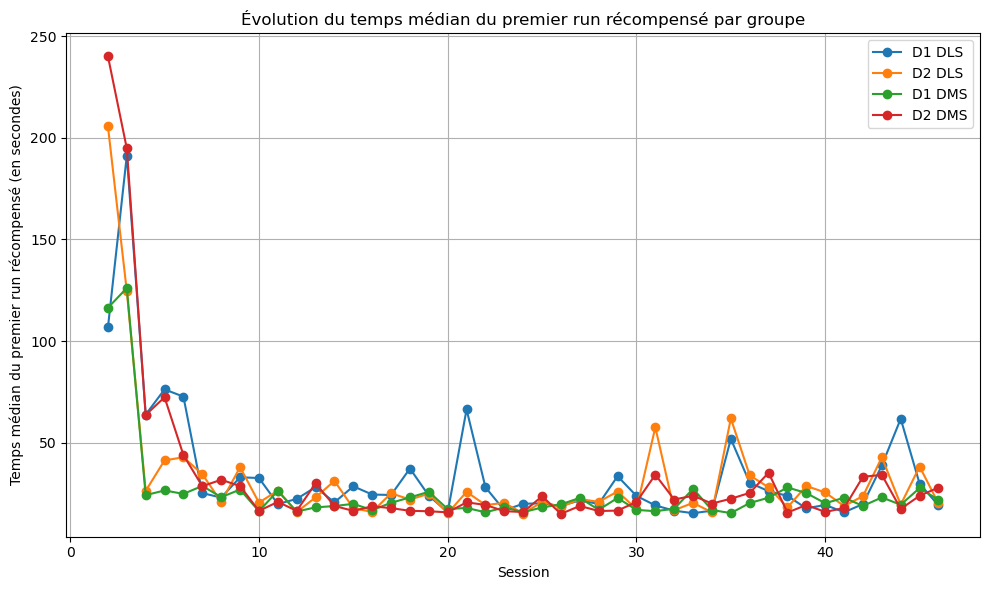

In [165]:
# Plot evolution of first reward time among sessions

# Créer une figure et des axes pour le plot
plt.figure(figsize=(10, 6))

# Ajuster les indices des sessions (décalage de 1)
adjusted_session_indices = {key: value - 1 for key, value in session_indices.items()}

# Pour chaque groupe, tracer la courbe de l'évolution des temps médians
for group_name, session_medians in median_times_by_group.items():
    # Générer l'axe des sessions (en commençant par 2)
    sessions = np.arange(2, len(session_medians) + 2)
    
    # Tracer la courbe pour ce groupe
    plt.plot(sessions, session_medians, label=group_name, marker='o')

    # for session_name, original_index in adjusted_session_indices.items():
    #     if original_index < len(session_medians):  # Vérifier que l'index est dans la plage des sessions disponibles
    #         plt.text(sessions[original_index], session_medians[original_index], 
    #                  f'{session_name}', color='red', fontsize=12, ha='center')

# Ajouter des labels et un titre
plt.xlabel('Session')
plt.ylabel('Temps médian du premier run récompensé (en secondes)')
plt.title('Évolution du temps médian du premier run récompensé par groupe')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()


In [166]:
# Retrieve all times between runs

def compute_all_time_deltas(run_type_dict, mice_list=None):
    """
    Calcule les intervalles de temps entre chaque run pour toutes les souris et toutes les sessions,
    et retourne un dictionnaire contenant les `time_deltas`. Si une `mice_list` est fournie, seul
    les souris de cette liste sont prises en compte.
    
    Args:
    - run_type_dict: Dictionnaire contenant les données des runs.
    - mice_list: Liste optionnelle des souris à considérer. Si None, toutes les souris sont utilisées.
    
    Retourne:
    - Un dictionnaire avec les time_deltas pour chaque souris et session.
    """
    # Si mice_list est None, utiliser toutes les souris dans run_type_dict
    if mice_list is None:
        mice_list = list(run_type_dict.keys())

    all_time_deltas = {}

    # Parcourir uniquement les souris spécifiées dans mice_list
    for mouse in mice_list:
        if mouse not in run_type_dict:
            print(f"{mouse} not in run type dictionnary.")
            continue  # Si la souris n'existe pas dans le dictionnaire, on passe à la suivante
        
        all_time_deltas[mouse] = {}  # Initialiser le sous-dictionnaire pour chaque souris
        
        for session_index, runs in run_type_dict[mouse].items():
            # Récupérer les epoch_times pour chaque run de la session actuelle
            epoch_times = [run[4]['epoch_time'] for run in runs]
            
            # Calculer les intervalles de temps entre chaque run
            time_deltas = [epoch_times[i+1] - epoch_times[i] for i in range(len(epoch_times) - 1)]
            
            # Ajouter les time_deltas pour cette session
            all_time_deltas[mouse][session_index] = time_deltas

    return all_time_deltas

all_time_deltas_QT = compute_all_time_deltas(runs_around_tower_dict)
all_time_deltas_rewarded = compute_all_time_deltas(rewarded_QT_dict)
all_time_deltas_CW = compute_all_time_deltas(CW_QT_dict)
all_time_deltas_CCW = compute_all_time_deltas(CCW_QT_dict)

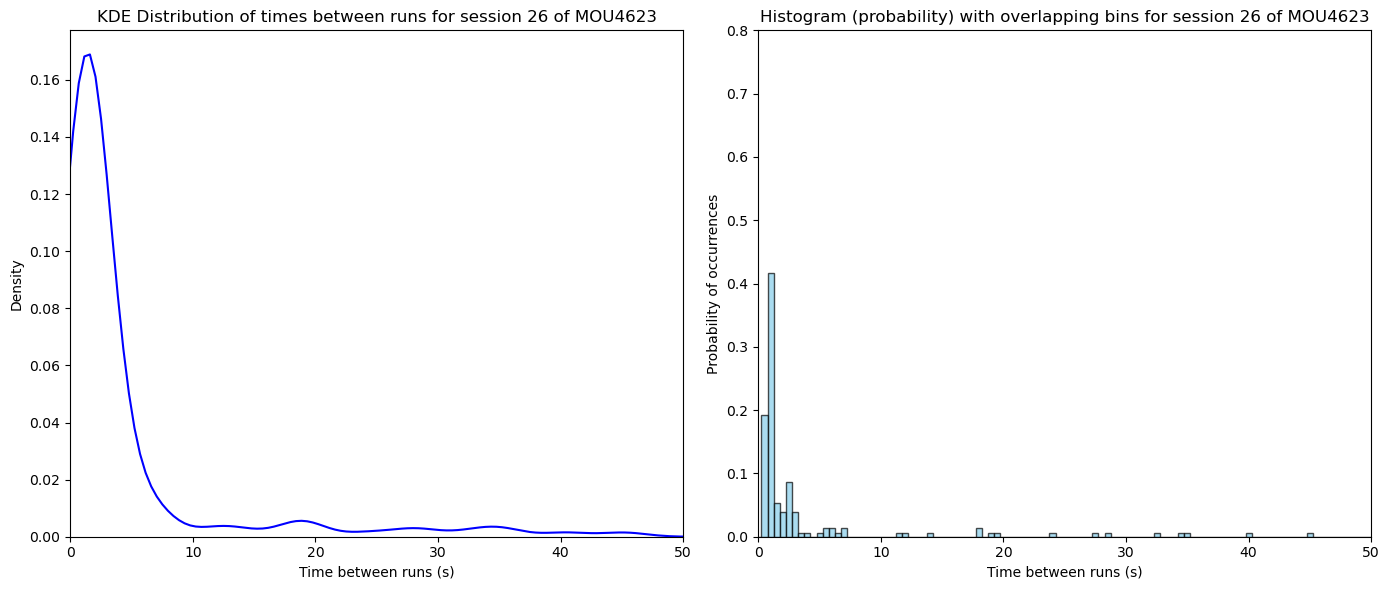

In [167]:
# Plot distribution of times between two runs around tower

def plot_run_intervals_distrib(all_time_deltas, session_index=0, mouse=mice_list[0]):
    """
    Plot la distribution des intervalles de temps entre les runs pour une souris et une session données,
    en utilisant les time_deltas pré-calculés dans all_time_deltas.
    
    Args:
    - all_time_deltas: Dictionnaire contenant les time_deltas pour chaque souris et session.
    - session_index: L'index de la session à analyser.
    - mouse: La souris pour laquelle afficher les intervalles.
    """
    # Vérifier que la session existe pour la souris donnée dans all_time_deltas
    if mouse not in all_time_deltas or session_index not in all_time_deltas[mouse]:
        print(f"Error: Session {session_index} does not exist for mouse {mouse}.")
        return

    # Récupérer les time_deltas pour la souris et la session spécifiées
    time_deltas = all_time_deltas[mouse][session_index]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Méthode 1: Utiliser la KDE avec un 'bandwidth' de 2 pour des "bins coulissants"
    sns.kdeplot(time_deltas, bw_adjust=0.5, color='blue', ax=axs[0])  # bw_adjust ajuste la largeur pour approximer des bins de 2s
    axs[0].set_xlabel("Time between runs (s)")
    axs[0].set_ylabel("Density")
    axs[0].set_title(f"KDE Distribution of times between runs for session {session_index} of {mouse}")
    axs[0].set_xlim(0, 50)
    
    # Méthode 2: Histogramme en probabilité d'occurrence
    bin_width = 0.5  # Largeur des bins en secondes
    max_time = max(time_deltas)
    bins = np.arange(0, max_time + bin_width, bin_width)
    counts, _, _ = axs[1].hist(time_deltas, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

    # Convertir en probabilité d'occurrence
    counts_prob = counts / len(time_deltas)  # Calculer la probabilité pour chaque bin
    axs[1].clear()  # Effacer l'histogramme brut avant de replotter avec les probabilités
    axs[1].bar(bins[:-1], counts_prob, width=bin_width, color='skyblue', edgecolor='black', alpha=0.7)
    
    axs[1].set_xlabel("Time between runs (s)")
    axs[1].set_ylabel("Probability of occurrences")
    axs[1].set_title(f"Histogram (probability) with overlapping bins for session {session_index} of {mouse}")
    axs[1].set_xlim(0, 50)
    axs[1].set_ylim(0, 0.8)

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_run_intervals_distrib(all_time_deltas_QT, session_index=26, mouse='MOU4623')


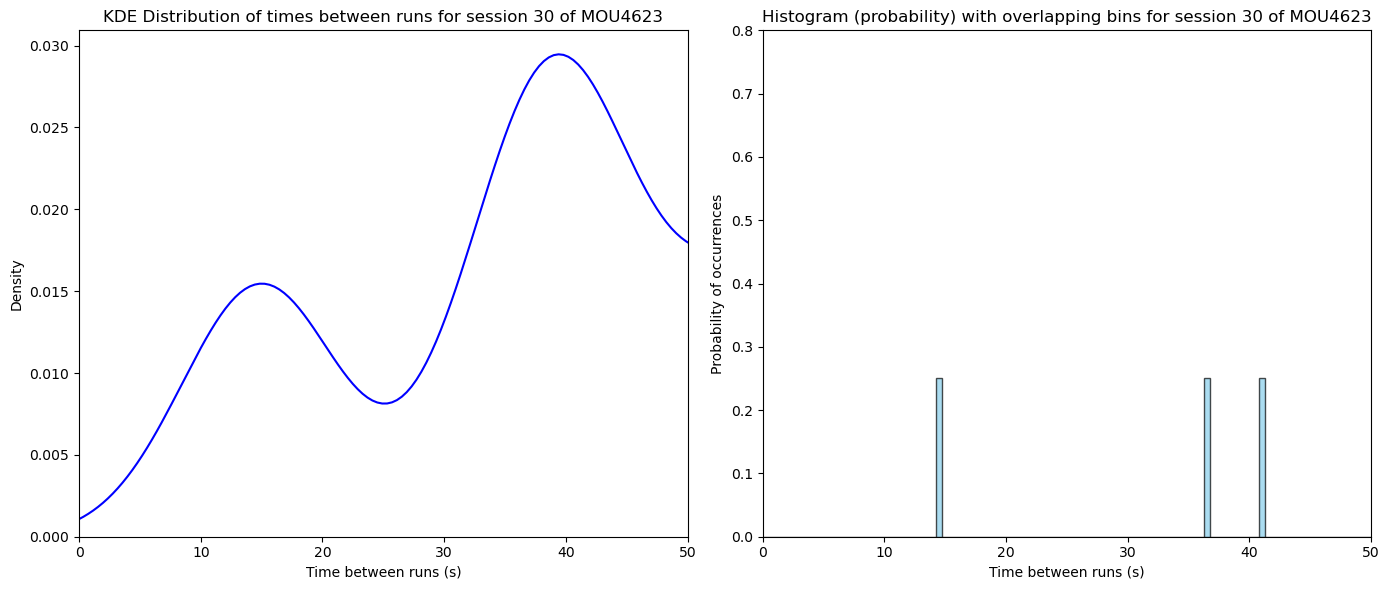

In [168]:
# Plot distribution of times between two rewarded runs around tower

plot_run_intervals_distrib(all_time_deltas_rewarded, session_index=30, mouse='MOU4623')

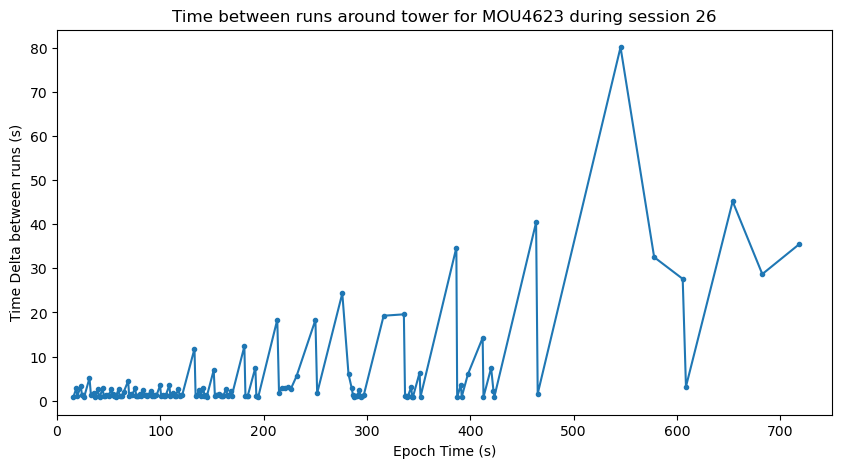

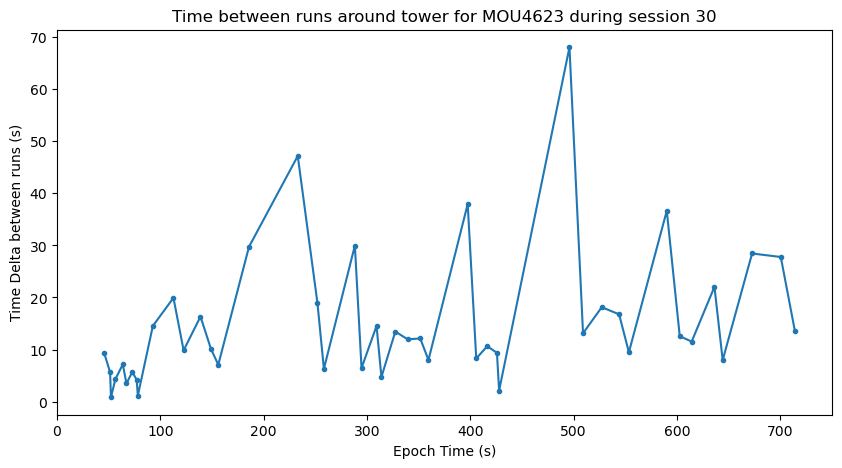

In [178]:
# Plot time between runs during a session for 1 mouse

def plot_time_deltas_for_session(run_type_dict, all_time_deltas, run_type = 'undefined type of run', mouse=mice_list[0], session_index=0):
    """
    Plot les `time_deltas` pour une souris et une session spécifiques,
    en fonction de l'epoch_time du run suivant, en utilisant `all_time_deltas`.

    Args:
    - run_type_dict: Dictionnaire contenant les données des runs (avec les epoch_times).
    - all_time_deltas: Dictionnaire contenant les `time_deltas` calculés pour chaque souris et session.
    - mouse: La souris à analyser.
    - session_index: L'index de la session à analyser.
    """
    # Vérifiez si la souris et la session existent dans le dictionnaire
    if mouse not in run_type_dict or session_index not in run_type_dict[mouse]:
        print(f"Données manquantes pour {mouse} ou session {session_index}.")
        return
    
    if mouse not in all_time_deltas or session_index not in all_time_deltas[mouse]:
        print(f"Time deltas non trouvés pour {mouse} ou session {session_index}.")
        return

    # Récupérer les epoch_times et time_deltas pour cette session de la souris spécifiée
    runs = run_type_dict[mouse][session_index]
    epoch_times = [run[4]['epoch_time'] for run in runs]
    time_deltas = all_time_deltas[mouse][session_index]
    
    # On utilise l'epoch_time du run suivant comme point de temps pour chaque time_delta
    epoch_times_for_plot = epoch_times[1:]  # Ignorer le premier epoch_time car il n'y a pas de time_delta avant lui

    # Plotter les time_deltas en fonction des epoch_times correspondants
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_times_for_plot, time_deltas, marker='o', linestyle='-', markersize=3)
    plt.xlabel('Epoch Time (s)')
    plt.ylabel('Time Delta between runs (s)')
    plt.title(f'Time between {run_type} for {mouse} during session {session_index}')
    plt.xlim(0,750)
    # plt.ylim(0,10)

# Exemples d'utilisation
plot_time_deltas_for_session(runs_around_tower_dict, all_time_deltas_QT, run_type = 'runs around tower', mouse='MOU4623', session_index=26)
plot_time_deltas_for_session(runs_around_tower_dict, all_time_deltas_QT, run_type = 'runs around tower', mouse='MOU4623', session_index=30)


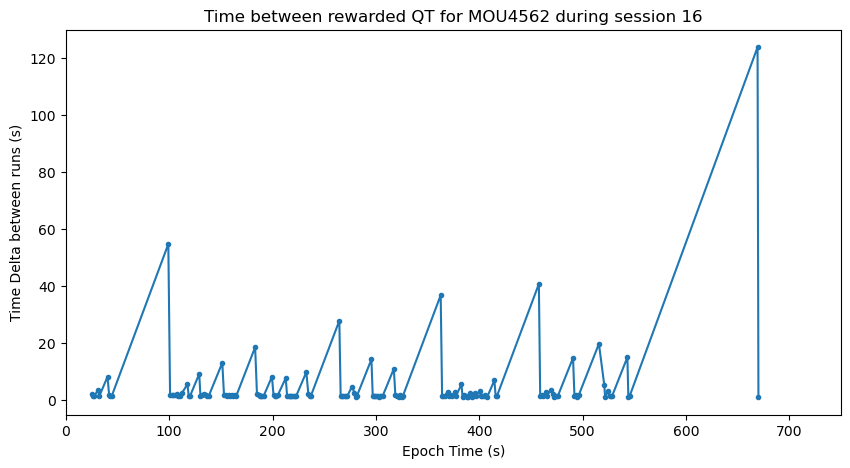

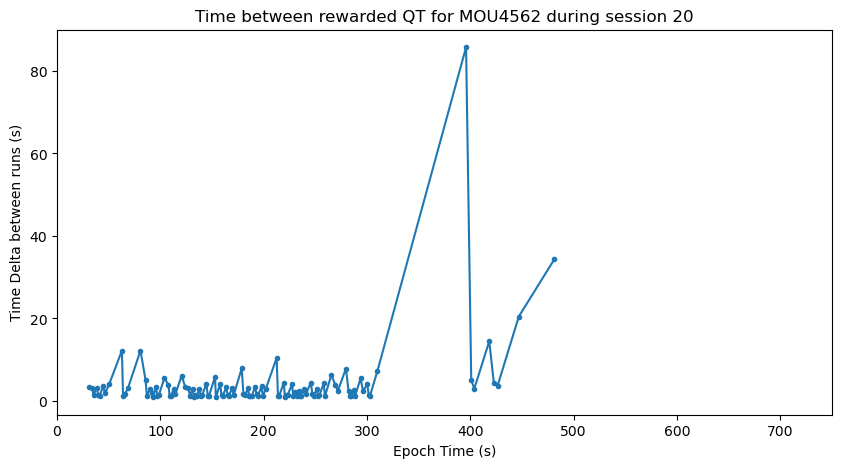

In [179]:
# Same but for rewarded runs around tower

plot_time_deltas_for_session(rewarded_QT_dict, all_time_deltas_rewarded, run_type = 'rewarded QT', mouse='MOU4562', session_index=16)
plot_time_deltas_for_session(rewarded_QT_dict, all_time_deltas_rewarded, run_type = 'rewarded QT', mouse='MOU4562', session_index=20)

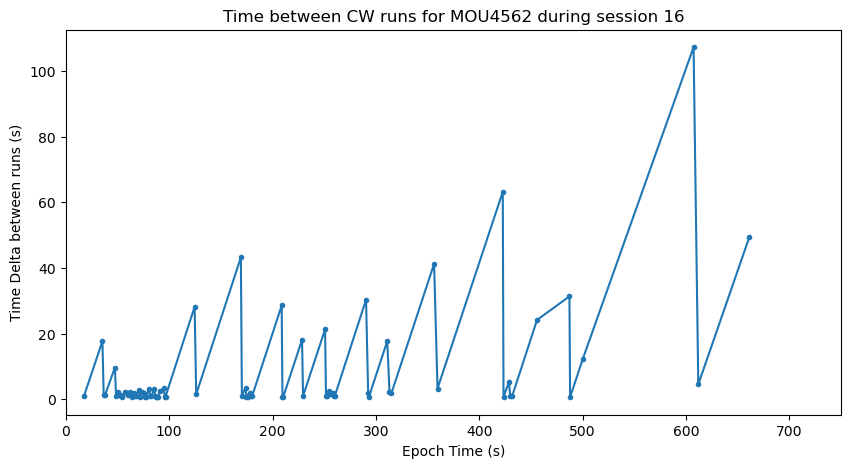

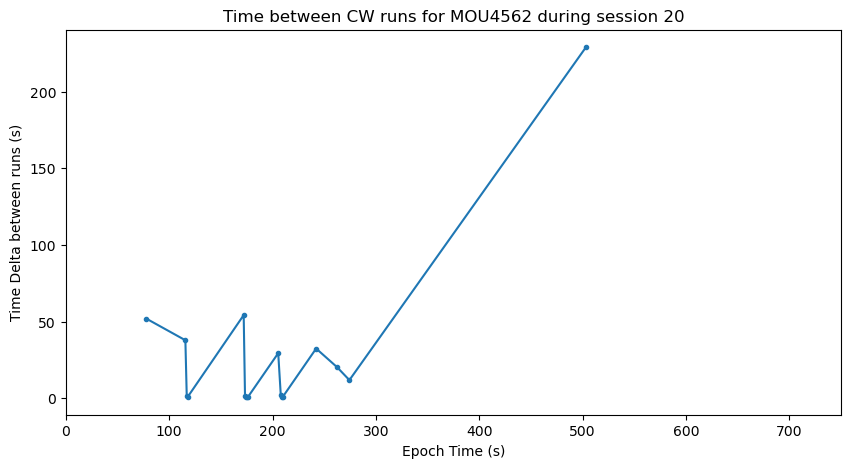

In [180]:
# Same but for CW runs around tower

plot_time_deltas_for_session(CW_QT_dict, all_time_deltas_CW, run_type = 'CW runs', mouse='MOU4562', session_index=16)
plot_time_deltas_for_session(CW_QT_dict, all_time_deltas_CW, run_type = 'CW runs', mouse='MOU4562', session_index=20)

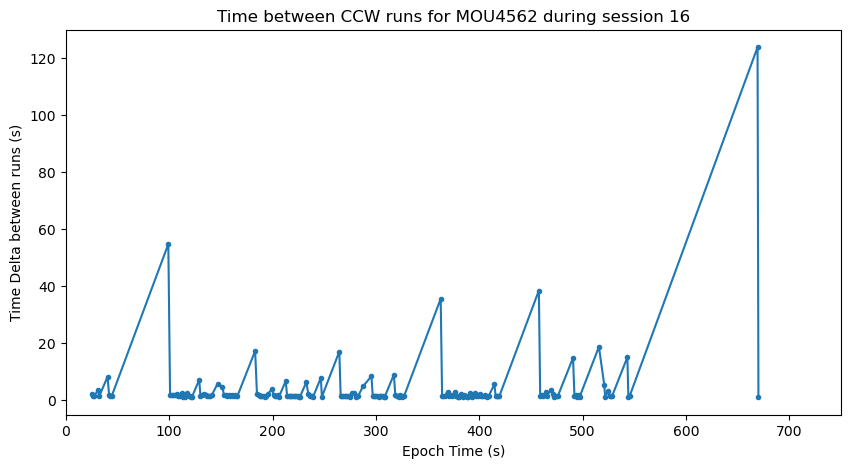

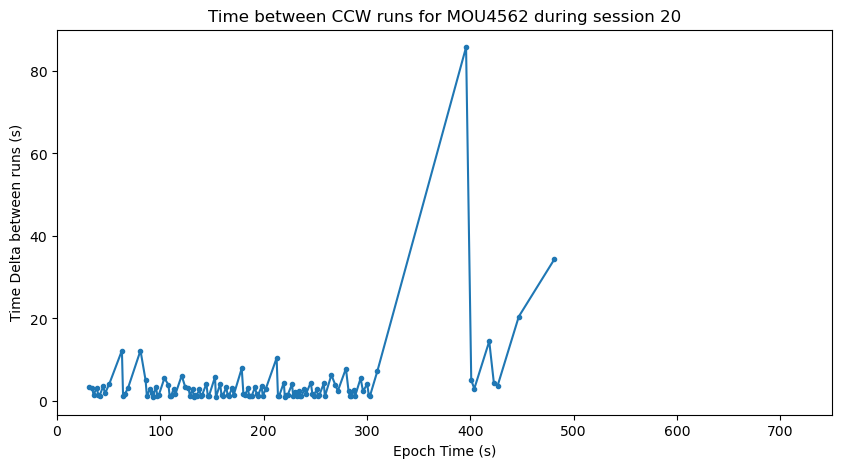

In [181]:
# Same but for CCW runs around tower

plot_time_deltas_for_session(CCW_QT_dict, all_time_deltas_CCW, run_type = 'CCW runs', mouse='MOU4562', session_index=16)
plot_time_deltas_for_session(CCW_QT_dict, all_time_deltas_CCW, run_type = 'CCW runs', mouse='MOU4562', session_index=20)

In [173]:
# Calculate median of +/-25-75 quartiles 

import numpy as np

def calculate_medians_and_quartiles(data_dict, session_indices):
    """
    Calcule les médianes et les quartiles 25 et 75 pour chaque souris dans les sessions
    'control' et 'CNO', et retourne deux dictionnaires : un pour les médianes et un pour les quartiles.
    
    Args:
    - data_dict: Le dictionnaire contenant les données des souris par session.
    - session_indices: Le dictionnaire des indices de session.
    
    Retourne:
    - median_dict: Dictionnaire des médianes pour chaque souris et session.
    - quartile_dict: Dictionnaire des quartiles (25 et 75) pour chaque souris et session.
    """
    median_dict = {}
    quartile_dict = {}

    for mouse, mouse_data in data_dict.items():
        median_dict[mouse] = {}
        quartile_dict[mouse] = {}

        for session_name, session_index in session_indices.items():
            # Vérifier que la session existe dans les données de la souris
            if session_index in mouse_data:
                session_data = mouse_data[session_index]
                # Calculer la médiane
                median_dict[mouse][session_index] = np.median(session_data)
                # Calculer les quartiles
                q25, q75 = np.percentile(session_data, [25, 75])
                quartile_dict[mouse][session_index] = (q25, q75)

    return median_dict, quartile_dict

median_dict_injections_QT, quartile_dict_injections_QT = calculate_medians_and_quartiles(all_time_deltas_QT, session_indices)
print(median_dict_injections_QT)

{'MOU3867': {16: 1.1999999999999886, 20: 2.2420000000000755, 26: 1.1210000000000093, 30: 2.1610000000000014, 40: 1.322999999999979, 42: 2.082499999999996}, 'MOU4551': {16: 1.2834999999999468, 20: 3.6999999999999886, 26: 1.0829999999999984, 30: 3.1415000000000006, 40: 1.2790000000000106, 42: 1.5200000000000102}, 'MOU4623': {16: 1.3600000000000065, 20: 18.168999999999983, 26: 1.2410000000000139, 30: 11.527999999999906, 40: 1.560000000000029, 42: 5.845000000000027}, 'MOU4562': {16: 1.3149999999999977, 20: 1.7014999999999958, 26: 1.2025000000000148, 30: 2.7019999999999698, 40: 1.1200000000000045, 42: 1.6025000000000134}, 'MOU4560': {16: 1.2410000000000423, 20: 3.740000000000009, 26: 1.1599999999999966, 30: 2.6225000000000023, 40: 1.399499999999989, 42: 2.2815000000000083}, 'MOU4624': {16: 1.2810000000000024, 20: 1.3620000000000232, 26: 1.160000000000025, 30: 1.200000000000017, 40: 1.120999999999988, 42: 1.1999999999999886}, 'MOU4552': {16: 1.3149999999999977, 20: 1.358000000000004, 26: 1.2

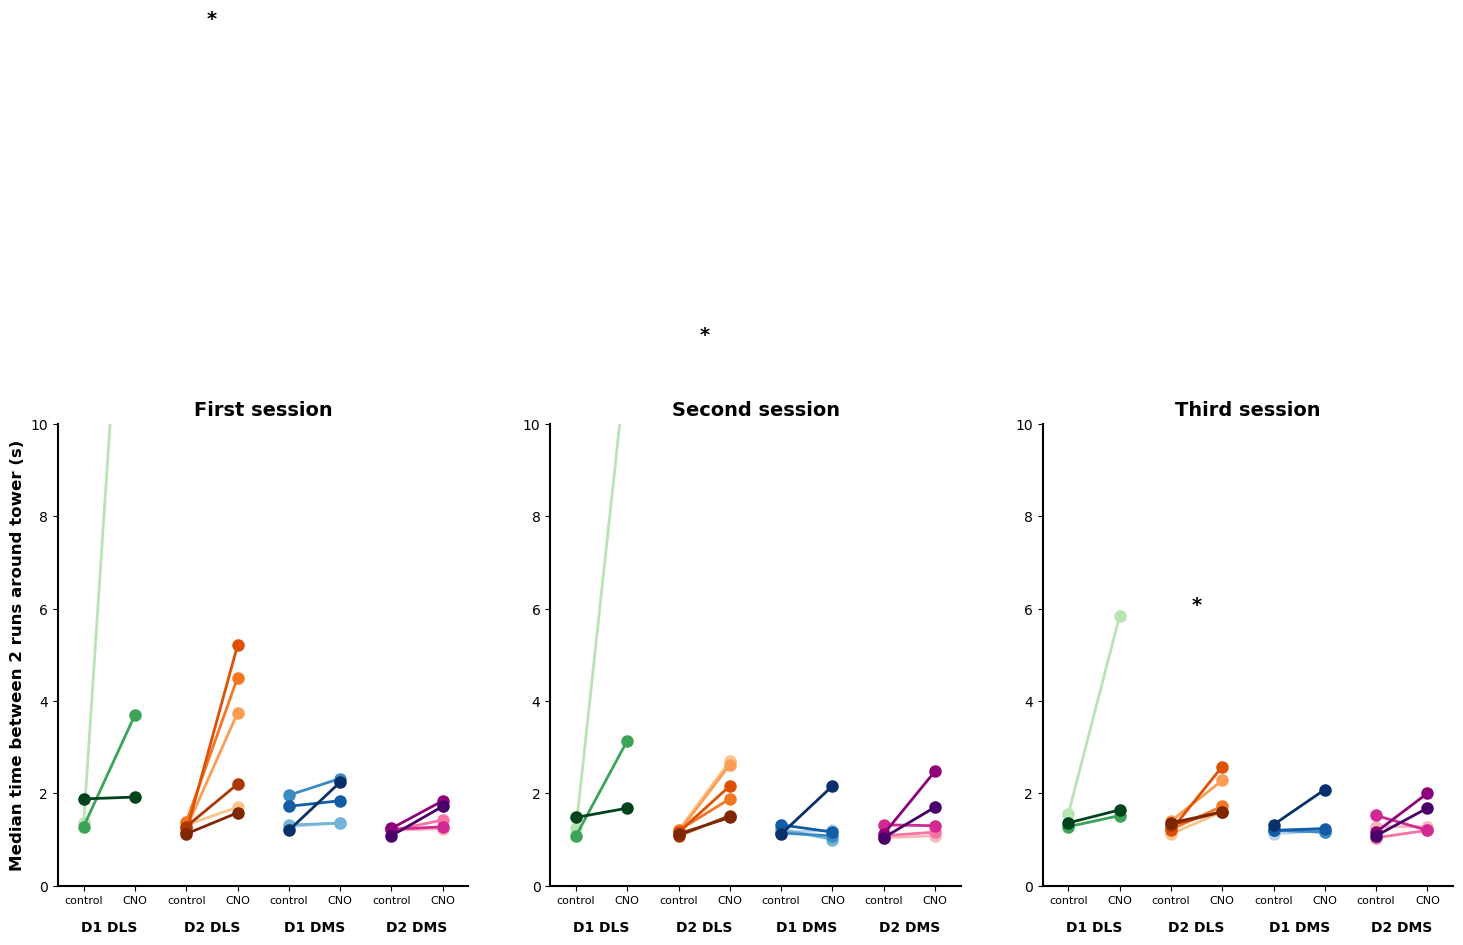

In [182]:
# Plot median time between 2 runs around tower 
# Utiliser gridspec_kw pour ajuster l'espacement vertical
fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'hspace': 0.2})
ylim_median_time_QT = (0,10)

# Comparer les sessions en appelant la fonction pour chaque paire
compare_sessions_by_group(axs[0], median_dict_injections_QT, groups, session_indices, session_type="first", ylabel='Median time between 2 runs around tower (s)', ylim=ylim_median_time_QT, quartile_dict=quartile_dict_injections_QT)
compare_sessions_by_group(axs[1], median_dict_injections_QT, groups, session_indices, session_type="second", ylabel=None, ylim=ylim_median_time_QT, quartile_dict=quartile_dict_injections_QT)
compare_sessions_by_group(axs[2], median_dict_injections_QT, groups, session_indices, session_type="third", ylabel=None, ylim=ylim_median_time_QT, quartile_dict=quartile_dict_injections_QT)

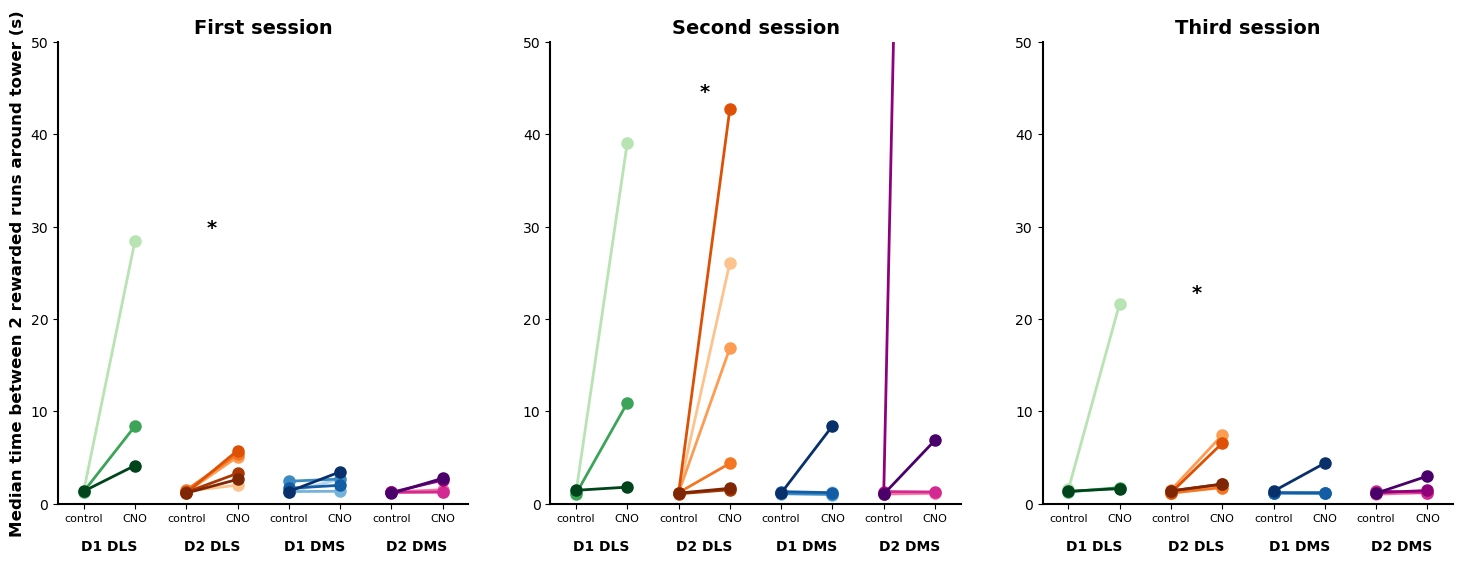

In [183]:
median_dict_injections_rewarded, quartile_dict_injections_rewarded = calculate_medians_and_quartiles(all_time_deltas_rewarded, session_indices)

fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'hspace': 0.2})
ylim_median_time_rewarded = (0,50)

# Comparer les sessions en appelant la fonction pour chaque paire
compare_sessions_by_group(axs[0], median_dict_injections_rewarded, groups, session_indices, session_type="first", ylabel='Median time between 2 rewarded runs around tower (s)', ylim=ylim_median_time_rewarded, quartile_dict=quartile_dict_injections_rewarded)
compare_sessions_by_group(axs[1], median_dict_injections_rewarded, groups, session_indices, session_type="second", ylabel=None, ylim=ylim_median_time_rewarded, quartile_dict=quartile_dict_injections_rewarded)
compare_sessions_by_group(axs[2], median_dict_injections_rewarded, groups, session_indices, session_type="third", ylabel=None, ylim=ylim_median_time_rewarded, quartile_dict=quartile_dict_injections_rewarded)

In [191]:
# Dictionnaire pour stocker les directions récompensées par session et par souris
rewarded_direction_per_session = {}

# Parcourir chaque souris dans la liste des souris
for mouse in mice_list:
    rewarded_direction_per_session[mouse] = {}  # Initialiser le sous-dictionnaire pour chaque souris
    
    # Parcourir chaque session de cette souris
    for session_index, session_name in enumerate(session_list[mouse]):
        # Construire le chemin d'accès au fichier CSV
        csv_file_path = os.path.join(path_to_data_folder, mouse, session_name, f"{session_name}_sessionparam.csv")
        
        # Lire le fichier CSV pour obtenir la colonne potentialRewardedDirections
        try:
            session_data = pd.read_csv(csv_file_path)
            rewarded_directions = session_data["potentialRewardedDirections"].iloc[0]  # Supposant que c'est dans la première ligne
            
            # Décoder la direction récompensée
            if rewarded_directions == "[90]":
                direction = "CCW"
            elif rewarded_directions == "[270]":
                direction = "CW"
            else:
                direction = "both"
            
            # Ajouter cette information dans le dictionnaire
            rewarded_direction_per_session[mouse][session_index] = direction

        except FileNotFoundError:
            print(f"Fichier {csv_file_path} non trouvé.")
        except Exception as e:
            print(f"Erreur lors de la lecture de {csv_file_path}: {e}")

# Afficher le dictionnaire final
print(rewarded_direction_per_session['MOU4562'])


{0: 'CW', 1: 'CW', 2: 'both', 3: 'both', 4: 'CCW', 5: 'CCW', 6: 'CW', 7: 'CW', 8: 'CCW', 9: 'CCW', 10: 'CW', 11: 'CW', 12: 'CCW', 13: 'CCW', 14: 'CW', 15: 'CW', 16: 'CCW', 17: 'CCW', 18: 'CW', 19: 'CW', 20: 'CCW', 21: 'CCW', 22: 'CW', 23: 'CW', 24: 'CCW', 25: 'CCW', 26: 'CW', 27: 'CW', 28: 'CCW', 29: 'CCW', 30: 'CW', 31: 'CW', 32: 'CCW', 33: 'CCW', 34: 'both', 35: 'both', 36: 'both', 37: 'both', 38: 'both', 39: 'both', 40: 'both', 41: 'both', 42: 'both', 43: 'both', 44: 'both', 45: 'both'}


In [193]:
print(run_around_tower_results_dict['MOU4562'][0])

{'NE': {'total_CW': 5, 'total_CCW': 2, 'rewarded_CW': 5, 'rewarded_CCW': 0}, 'NW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'SE': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'SW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'All': {'total_CW': 5, 'total_CCW': 2, 'rewarded_CW': 5, 'rewarded_CCW': 0}}


In [205]:
# Just a test to check how to access to the percentage of turns in the rewarded direction

for mouse in mice_list:
    for session_index, session_name in enumerate(session_list[mouse]):
        total_CW = run_around_tower_results_dict[mouse][session_index]['All']['total_CW']
        total_CCW = run_around_tower_results_dict[mouse][session_index]['All']['total_CCW']
        percentage_CW = (total_CW / (total_CW + total_CCW)) * 100
        percentage_CCW = (total_CCW / (total_CW + total_CCW)) * 100
        print(percentage_CCW) 

58.82352941176471
44.44444444444444
60.56338028169014
64.44444444444444
30.0
7.491856677524431
53.714285714285715
92.10526315789474
35.958005249343834
11.818181818181818
69.39759036144578
84.17508417508418
43.35443037974683
15.294117647058824
70.04504504504504
91.29129129129129
33.568075117370896
5.714285714285714
65.45454545454545
83.72093023255815
13.88888888888889
9.283819628647215
81.99052132701422
94.38502673796792
16.477272727272727
7.569721115537849
88.18681318681318
91.9047619047619
16.666666666666664
12.741312741312742
32.7683615819209
92.6208651399491
21.54255319148936
10.126582278481013
52.069716775599126
44.161358811040344
60.76233183856502
36.144578313253014
55.5793991416309
65.01079913606912
51.13924050632911
38.0352644836272
36.40167364016737
54.29769392033543
48.72979214780601
47.4025974025974
42.857142857142854
50.0
75.0
73.33333333333333
63.41463414634146
34.21052631578947
48.38709677419355
80.88235294117648
54.6875
15.765765765765765
52.331606217616574
86.24535315985

In [211]:
# Plot the percentage of success before and after CNO : %turns in rewarded direction/total

def calculate_success_percentage(mice_list, results_dict, direction_dict, percentage_rewarded_dict):
    """
    Calcule le pourcentage de succès pour chaque session de chaque souris, en fonction de la direction
    récompensée de la session (CW, CCW, ou les deux directions).

    Args:
    - mice_list: Liste des souris à considérer.
    - results_dict: Dictionnaire contenant les résultats des runs pour chaque session de chaque souris.
    - direction_dict: Dictionnaire indiquant la direction récompensée pour chaque session de chaque souris.
    - percentage_rewarded_dict: Dictionnaire contenant le pourcentage global de réussite pour chaque session.

    Retourne:
    - Un dictionnaire avec les pourcentages de succès ajustés pour chaque souris et session.
    """
    success_percentage_dict = {}

    for mouse in mice_list:
        success_percentage_dict[mouse] = {}

        # Parcourir chaque session de la souris
        for session_index, session_name in enumerate(session_list[mouse]):
            # Récupérer la direction récompensée de la session
            rewarded_direction = direction_dict[mouse].get(session_index, "both")
            
            # Récupérer les résultats pour CW et CCW
            total_CW = results_dict[mouse][session_index]['All']['total_CW']
            total_CCW = results_dict[mouse][session_index]['All']['total_CCW']
            
            # Calculer les pourcentages pour CW et CCW
            if total_CW + total_CCW > 0:  # Éviter la division par zéro
                percentage_CW = round((total_CW / (total_CW + total_CCW)) * 100, 2)
                percentage_CCW = round((total_CCW / (total_CW + total_CCW)) * 100, 2)
            else:
                percentage_CW = percentage_CCW = 0  # Si aucun run, pourcentage de succès est 0
                
            # Sélectionner le pourcentage en fonction de la direction récompensée
            if rewarded_direction == "both":
                success_percentage = percentage_rewarded_dict[mouse][session_index]
            elif rewarded_direction == "CW":
                success_percentage = percentage_CW
            elif rewarded_direction == "CCW":
                success_percentage = percentage_CCW
            else:
                print(f"No rewarded direction defined for session {session_index}")
                success_percentage = 0  # Cas par défaut si une valeur imprévue est présente

            # Ajouter au dictionnaire
            success_percentage_dict[mouse][session_index] = success_percentage

    return success_percentage_dict

# Utilisation de la fonction
success_percentage_dict = calculate_success_percentage(mice_list, run_around_tower_results_dict, rewarded_direction_per_session, percentage_rewarded_dict)
print(success_percentage_dict['MOU4562'])

{0: 71.43, 1: 100.0, 2: 100.0, 3: 100.0, 4: 61.9, 5: 74.07, 6: 41.89, 7: 73.97, 8: 60.92, 9: 91.92, 10: 60.15, 11: 84.18, 12: 59.79, 13: 90.28, 14: 50.99, 15: 88.6, 16: 69.12, 17: 90.31, 18: 63.77, 19: 94.44, 20: 86.26, 21: 92.77, 22: 77.46, 23: 90.6, 24: 87.88, 25: 98.91, 26: 80.0, 27: 84.86, 28: 91.53, 29: 98.54, 30: 15.56, 31: 91.45, 32: 82.13, 33: 97.93, 34: 34.73, 35: 43.84, 36: 43.19, 37: 42.9, 38: 49.73, 39: 44.56, 40: 48.37, 41: 36.54, 42: 35.84, 43: 44.12, 44: 48.55, 45: 53.87}


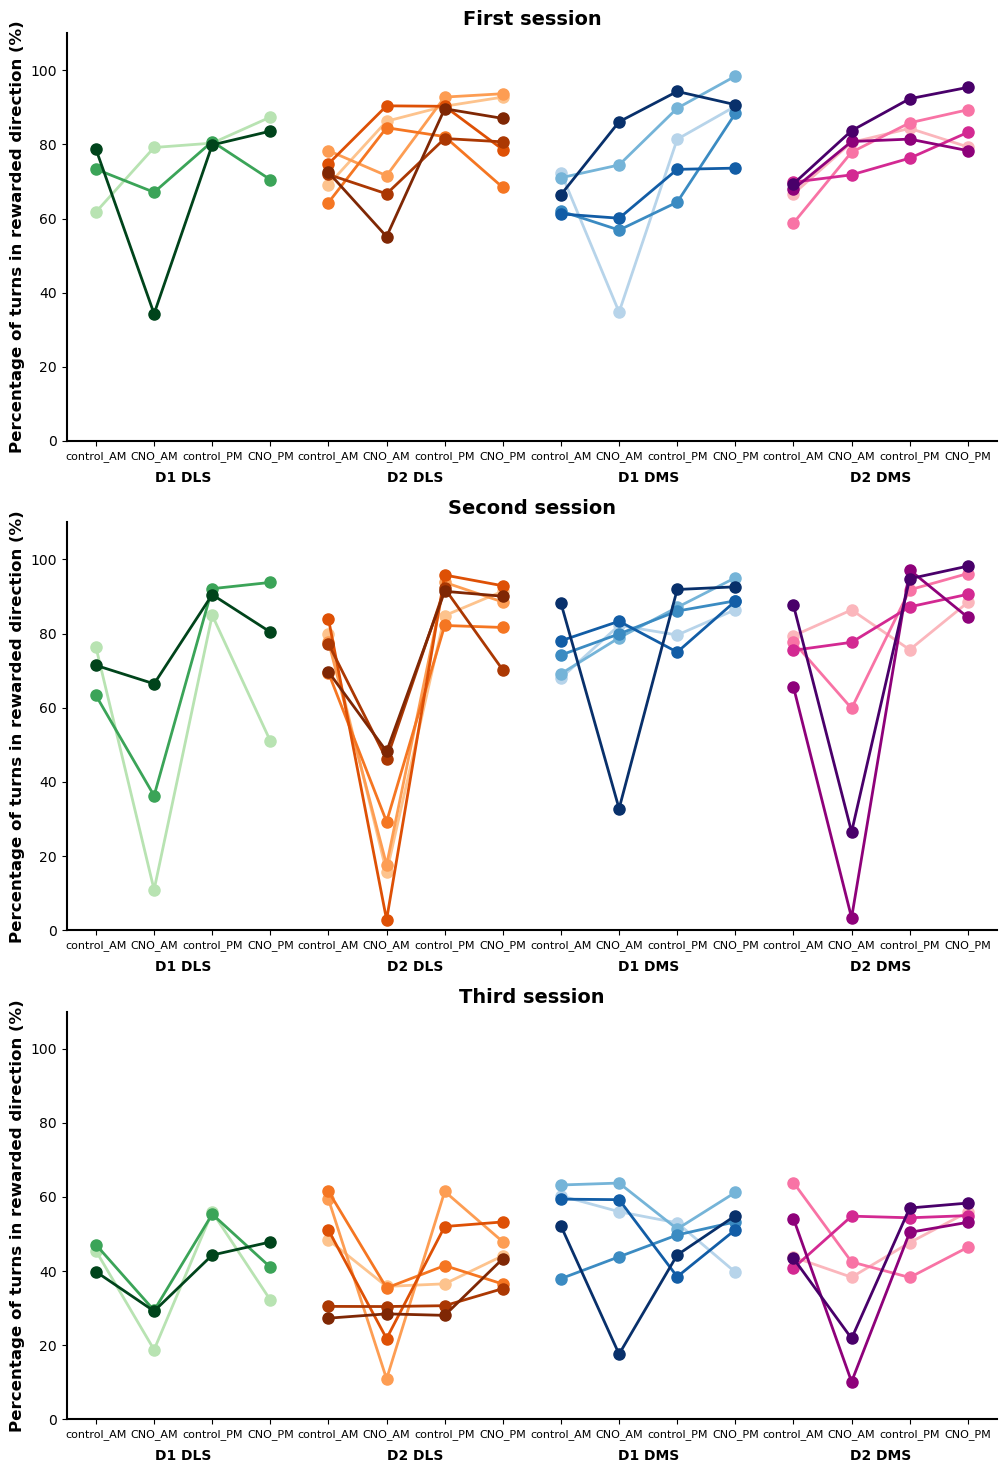

In [222]:
def compare_four_sessions_by_group(ax, data_dict, groups, session_indices, session_type="first", ylabel=None, ylim=(0,110)):
    """
    Compare les pourcentages de succès pour quatre sessions (control_AM, CNO_AM, control_PM, CNO_PM) pour chaque groupe.

    Parameters:
    - ax: L'axe sur lequel le graphique sera tracé.
    - success_percentage_dict: Dictionnaire contenant les pourcentages de succès pour chaque session.
    - groups: Dictionnaire des groupes de souris à analyser, avec le nom du groupe comme clé et la liste des souris comme valeur.
    - session_indices: Dictionnaire des indices de sessions.
    - session_type: "first", "second", ou "third" pour déterminer les sessions à comparer.
    - ylabel: Label de l'axe Y pour le graphique.
    - ylim: Limite pour l'axe Y.
    """
    # Extraire les indices de sessions AM
    control_AM_index = session_indices.get(f"control_{session_type}")
    CNO_AM_index = session_indices.get(f"CNO_{session_type}")

    if control_AM_index is None or CNO_AM_index is None:
        print(f"Erreur : indices de session manquants pour le type '{session_type}'.")
        return
    
    # Calculer les indices pour PM en ajoutant 1 aux indices AM
    control_PM_index = control_AM_index + 1
    CNO_PM_index = CNO_AM_index + 1
    
    # Labels pour les quatre sessions
    session_labels = ["control_AM", "CNO_AM", "control_PM", "CNO_PM"]
    tick_positions = []
    group_annotations = []

    # Définir les colormaps pour chaque groupe
    colormaps = {
        "D1 DLS": "Greens",
        "D2 DLS": "Oranges",
        "D1 DMS": "Blues",
        "D2 DMS": "RdPu",
        "D1 dS": "Purples",
        "D2 dS": "OrRd"
    }
    
    # Parcourir chaque groupe pour extraire et tracer les données
    for i, (group_name, group_mice) in enumerate(groups.items()):
        group_session_data = {label: [] for label in session_labels}  # Conteneur pour les données des sessions du groupe
        
        # Extraire les données pour chaque souris du groupe
        for mouse in group_mice:
            # Vérifier la disponibilité des données pour chaque session
            if control_AM_index in data_dict[mouse] and \
               CNO_AM_index in data_dict[mouse] and \
               control_PM_index in data_dict[mouse] and \
               CNO_PM_index in data_dict[mouse]:

                # Ajouter les données de chaque session pour la souris
                group_session_data["control_AM"].append(data_dict[mouse][control_AM_index])
                group_session_data["CNO_AM"].append(data_dict[mouse][CNO_AM_index])
                group_session_data["control_PM"].append(data_dict[mouse][control_PM_index])
                group_session_data["CNO_PM"].append(data_dict[mouse][CNO_PM_index])
            else:
                print(f"Avertissement : données manquantes pour {mouse} dans les sessions de type '{session_type}'")

        # Position des ticks pour le groupe (4 par groupe : control_AM, CNO_AM, control_PM, CNO_PM)
        base_position = i * 4
        for j, label in enumerate(session_labels):
            tick_positions.append(base_position + j)

        # Ajouter une annotation pour le groupe centré entre les positions des sessions
        group_annotations.append((base_position + 1.5, group_name))  # Centre des quatre sessions
        
        # Récupérer la colormap pour le groupe
        cmap = plt.get_cmap(colormaps.get(group_name))
        colors = cmap(np.linspace(0.3, 1, len(group_mice)))

        # Tracer les points pour chaque souris dans le groupe
        for j in range(len(group_session_data["control_AM"])):
            data = [
                group_session_data["control_AM"][j],
                group_session_data["CNO_AM"][j],
                group_session_data["control_PM"][j],
                group_session_data["CNO_PM"][j]
            ]
            ax.plot(range(base_position, base_position + 4), data, color=colors[j], linewidth=2, linestyle='-', marker='o', markersize=8)
    
    # Ajouter des titres et des labels
    ax.set_title(f'{session_type.capitalize()} session', fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')

    # Définir les positions et labels des ticks sur l'axe X pour chaque session
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(session_labels * len(groups))  # Répéter les labels pour chaque groupe
    
    # Limiter l'axe Y pour ajouter de la marge
    all_data = [value for group_mice in groups.values() for mouse in group_mice
                for value in [data_dict[mouse].get(control_AM_index),
                              data_dict[mouse].get(CNO_AM_index),
                              data_dict[mouse].get(control_PM_index),
                              data_dict[mouse].get(CNO_PM_index)]
                if value is not None]
    ax.set_xlim(-0.5, len(groups) * 4 - 0.5)
    if ylim is None:
        ax.set_ylim(0, max(all_data) * 1.2)
    else:
        ax.set_ylim(ylim)

    # Ajouter les annotations pour les groupes sous chaque bloc de ticks
    for pos, group_name in group_annotations:
        ax.annotate(group_name, xy=(pos, -0.1), xycoords=('data', 'axes fraction'), ha='center', 
                    fontsize=10, fontweight='bold')

    # Suppression des grilles pour un look plus propre
    ax.grid(False)

    # Améliorer la lisibilité des axes
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Utilisation de la fonction pour tracer les résultats
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
compare_four_sessions_by_group(axs[0], success_percentage_dict, groups, session_indices, session_type="first", ylabel='Percentage of turns in rewarded direction (%)')
compare_four_sessions_by_group(axs[1], success_percentage_dict, groups, session_indices, session_type="second", ylabel='Percentage of turns in rewarded direction (%)')
compare_four_sessions_by_group(axs[2], success_percentage_dict, groups, session_indices, session_type="third", ylabel='Percentage of turns in rewarded direction (%)')


### Mesure du biais directionnel en début de session et modulation de vitesse:

Objectif du biais directionnel en début de session : Pour déterminer si le biais est plus marqué en début de session et modulé par la présence de CNO, tu peux examiner les quarts de tours réalisés dans la direction préférée (le sens du biais) versus la direction imposée. 

Indice de biais directionnel : Calcule un indice de biais en prenant la proportion de quarts de tours dans la direction du biais par rapport au total des quarts de tours au cours des premières minutes (par exemple, 5 premières minutes).

### Comparaison entre sessions "opposées" et "alignées" : 

Quantifie le pourcentage de quarts de tours réussis dans les sessions où la direction de récompense est opposée au biais naturel induit par le CNO versus celles où elle est alignée. Cela permettrait de montrer quantitativement le désavantage induit par le biais dans certaines sessions par rapport aux autres.

## 2. Analyse des changements de vitesse et de trajectoire
### Analyse des trajectoires autour des tours : 

Plotte les trajectoires pour voir si les animaux injectés ont tendance à réaliser un arc de cercle plus large ou plus étroit autour des tours en fonction du sens imposé.

Trace les trajectoires autour des tours pour chaque session. Ensuite, quantifie le rayon moyen de l’arc de cercle autour des tours en mesurant la distance entre la souris et le centre de chaque tour pendant qu’elle tourne.

Paramètres d’analyse :
- Rayon moyen autour des tours : Compare la distance moyenne au centre des tours pour chaque condition expérimentale.
- Analyse des écarts à l’arc de cercle : Une variance plus élevée du rayon pourrait montrer une difficulté à maintenir une trajectoire stable.

## 3. Analyse de l'apprentissage et de la plasticité entre les sessions
### Performance "cross-session" : 

Évalue le taux de réussite de chaque session matinale par rapport à l'après-midi suivant. Une analyse de régression sur la performance entre sessions pourrait montrer si les animaux sous CNO dans une condition contraignante (opposée au biais) "apprennent" mieux, en augmentant leur performance l’après-midi, comparé aux autres conditions.

## 4. Influence de l’historique des rewards sur le comportement futur
### Influence du nombre de récompenses reçues sur la persévérance autour des tours :
Analyse la relation entre le nombre de récompenses atteintes à la tour précédente et le nombre de quarts de tours effectués dans la tour actuelle. En particulier, mesure si un nombre élevé de récompenses dans la tour précédente amène les souris à rester plus longtemps à la tour suivante ou à la quitter plus vite une fois la récompense atteinte.

### Influence du nombre de récompenses sur la vitesse des quarts de tours

Enregistre la vitesse des quarts de tours après avoir atteint le maximum de récompenses dans un tour précédent, puis compare cette vitesse lorsque les récompenses précédentes étaient faibles versus élevées.

### Analyse des trajectoires entre les tours en fonction des récompenses précédentes

Examine les trajectoires des souris entre deux tours et analyse si ces trajectoires deviennent plus directes après être allées dans une tour hautement récompensée, ou si elles restent plus exploratoires.

In [ ]:
# later

### Analyse de la persistance directionnelle en fonction des récompenses obtenues

Quantifie si les animaux tendent à conserver la même direction de quart de tour d’une tour à l’autre après avoir reçu un nombre élevé de récompenses (ou en fonction du nombre de récompenses obtenues). Une telle persistance pourrait indiquer que les récompenses renforcent non seulement l’emplacement mais aussi la direction du mouvement.